In [1]:
import multirex as mrex
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import pandas as pd
from tqdm import tqdm
import ast
import joblib
import warnings
from sklearn.exceptions import DataConversionWarning


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
## general metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# accuracy, f1 , recall, precision
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
## hamming loss and exact match
from sklearn.metrics import hamming_loss, accuracy_score

%matplotlib inline
waves=np.loadtxt("waves.txt")
n_points = len(waves)

In [2]:
def normalize_min_max_by_row(df):
    min_by_row = df.min(axis=1)
    max_by_row = df.max(axis=1)
    # Diferencia entre máximos y mínimos
    range_by_row = max_by_row - min_by_row
    normalized = (df.sub(min_by_row, axis=0)).div(range_by_row, axis=0)
    normalized[range_by_row == 0] = 0
    return normalized

def string_to_list(string):
    return ast.literal_eval(string)

def plot_confusion_matrix(y_test, y_pred, labels, display_labels, title):
    cm = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')
    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(values_format=".0%", colorbar=True, ax=ax)
    disp.im_.colorbar.remove()  
    disp.im_.set_clim(0, 1) 

    cbar = fig.colorbar(disp.im_, ax=ax)
    cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1)) 

    # Ajustes de formato y título
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.title(title, fontsize=20)

    plt.show()

def remove_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [3]:
## load csv
CO2_data = pd.read_csv("spec_data/CO2_data.csv")
CO2_data["label"]=0
CO2_data.data=CO2_data.iloc[:,-n_points:]
CO2_data.params=CO2_data.iloc[:,:-n_points]

CH4_data = pd.read_csv("spec_data/CH4_data.csv")
CH4_data["label"]=1
CH4_data.data=CH4_data.iloc[:,-n_points:]
CH4_data.params=CH4_data.iloc[:,:-n_points]

O3_data = pd.read_csv("spec_data/O3_data.csv")
O3_data["label"]=1
O3_data.data=O3_data.iloc[:,-n_points:]
O3_data.params=O3_data.iloc[:,:-n_points]

H2O_data = pd.read_csv("spec_data/H2O_data.csv")
H2O_data["label"]=0
H2O_data.data=H2O_data.iloc[:,-n_points:]
H2O_data.params=H2O_data.iloc[:,:-n_points]

CH4_O3_data = pd.read_csv("spec_data/CH4_O3_data.csv")
CH4_O3_data["label"]=1
CH4_O3_data.data=CH4_O3_data.iloc[:,-n_points:]
CH4_O3_data.params=CH4_O3_data.iloc[:,:-n_points]

CH4_H2O_data = pd.read_csv("spec_data/CH4_H2O_data.csv")
CH4_H2O_data["label"]=1
CH4_H2O_data.data=CH4_H2O_data.iloc[:,-n_points:]
CH4_H2O_data.params=CH4_H2O_data.iloc[:,:-n_points]

O3_H2O_data = pd.read_csv("spec_data/O3_H2O_data.csv")
O3_H2O_data["label"]=1
O3_H2O_data.data=O3_H2O_data.iloc[:,-n_points:]
O3_H2O_data.params=O3_H2O_data.iloc[:,:-n_points]

CH4_O3_H2O_data = pd.read_csv("spec_data/CH4_O3_H2O_data.csv")
CH4_O3_H2O_data["label"]=1
CH4_O3_H2O_data.data=CH4_O3_H2O_data.iloc[:,-n_points:]
CH4_O3_H2O_data.params=CH4_O3_H2O_data.iloc[:,:-n_points]

C:\Users\santi\AppData\Local\Temp\ipykernel_10040\2843711907.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CO2_data.data=CO2_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_10040\2843711907.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CO2_data.params=CO2_data.iloc[:,:-n_points]
C:\Users\santi\AppData\Local\Temp\ipykernel_10040\2843711907.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CH4_data.data=CH4_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_10040\2843711907.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata

## Train data

### SNR = 1

In [4]:
SNR1_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=20_000,
    SNR=1     
)

SNR1_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR=1     
)

SNR1_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=300,
    SNR=1     
)

SNR1_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=1000,
    SNR=1     
)

SNR1_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=20,
    SNR=1
)

SNR1_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=20,
    SNR=1
)

SNR1_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=20,
    SNR=1
)

SNR1_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=5,
    SNR=1
)
    
SNR1_df = pd.concat(
    [
        SNR1_CO2_data,
        SNR1_CH4_data,
        SNR1_O3_data,
        SNR1_H2O_data,
        SNR1_CH4_O3_data,
        SNR1_CH4_H2O_data,
        SNR1_O3_H2O_data,
        SNR1_CH4_O3_H2O_data
    ],
    ignore_index=True
) 

### SNR = 3

In [5]:
SNR3_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=20_000,
    SNR=3     
)

SNR3_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR=3     
)

SNR3_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=300,
    SNR=3     
)

SNR3_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=1000,
    SNR=3     
)

SNR3_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=20,
    SNR=3
)

SNR3_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=20,
    SNR=3
)

SNR3_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=20,
    SNR=3
)

SNR3_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=5,
    SNR=3
)
    

SNR3_df = pd.concat(
    [
        SNR3_CO2_data,
        SNR3_CH4_data,
        SNR3_O3_data,
        SNR3_H2O_data,
        SNR3_CH4_O3_data,
        SNR3_CH4_H2O_data,
        SNR3_O3_H2O_data,
        SNR3_CH4_O3_H2O_data
    ],
    ignore_index=True
) 

### SNR = 6

In [6]:
SNR6_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=20_000,
    SNR=6     
)

SNR6_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR=6     
)

SNR6_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=300,
    SNR=6     
)

SNR6_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=1000,
    SNR=6     
)

SNR6_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=20,
    SNR=6
)

SNR6_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=20,
    SNR=6
)

SNR6_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=20,
    SNR=6
)

SNR6_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=5,
    SNR=6
)
    

SNR6_df = pd.concat(
    [
        SNR6_CO2_data,
        SNR6_CH4_data,
        SNR6_O3_data,
        SNR6_H2O_data,
        SNR6_CH4_O3_data,
        SNR6_CH4_H2O_data,
        SNR6_O3_H2O_data,
        SNR6_CH4_O3_H2O_data
    ],
    ignore_index=True
)

### SNR = 10

In [7]:
### SNR = 10

SNR10_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=10_000,
    SNR=10     
)

SNR10_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR=10    
)

SNR10_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=300,
    SNR=10    
)

SNR10_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=500,
    SNR=10    
)

SNR10_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=20,
    SNR=10
)

SNR10_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=20,
    SNR=10
)

SNR10_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=20,
    SNR=10
)

SNR10_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=5,
    SNR=10
)
    

SNR10_df = pd.concat(
    [
        SNR10_CO2_data,
        SNR10_CH4_data,
        SNR10_O3_data,
        SNR10_H2O_data,
        SNR10_CH4_O3_data,
        SNR10_CH4_H2O_data,
        SNR10_O3_H2O_data,
        SNR10_CH4_O3_H2O_data
    ],
    ignore_index=True
) 

### SNR = 20

In [8]:
SNR20_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=10_000,
    SNR=20     
)

SNR20_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR=20     
)

SNR20_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=300,
    SNR=20     
)

SNR20_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=500,
    SNR=20     
)

SNR20_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=20,
    SNR=20
)

SNR20_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=20,
    SNR=20
)

SNR20_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=20,
    SNR=20
)

SNR20_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=5,
    SNR=20
)
    

SNR20_df = pd.concat(
    [
        SNR20_CO2_data,
        SNR20_CH4_data,
        SNR20_O3_data,
        SNR20_H2O_data,
        SNR20_CH4_O3_data,
        SNR20_CH4_H2O_data,
        SNR20_O3_H2O_data,
        SNR20_CH4_O3_H2O_data
    ],
    ignore_index=True
) 

### SNR = NaN

In [9]:
SNRnan_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=10000,
    SNR=10_000     
)

SNRnan_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR=10_000     
)

SNRnan_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=500,
    SNR=10_000     
)

SNRnan_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=500,
    SNR=10_000     
)

SNRnan_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=50,
    SNR=10_000
)

SNRnan_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=50,
    SNR=10_000
)

SNRnan_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=50,
    SNR=10_000
)

SNRnan_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=5,
    SNR=10_000
)
    

SNRnan_df = pd.concat(
    [
        SNRnan_CO2_data,
        SNRnan_CH4_data,
        SNRnan_O3_data,
        SNRnan_H2O_data,
        SNRnan_CH4_O3_data,
        SNRnan_CH4_H2O_data,
        SNRnan_O3_H2O_data,
        SNRnan_CH4_O3_H2O_data
    ],
    ignore_index=True
) 

In [10]:
SNRall= pd.concat([SNR1_df,SNR3_df,SNR6_df,SNR10_df,SNR20_df,SNRnan_df],ignore_index=True)
SNRall_train, SNRall_test = train_test_split(SNRall, test_size=0.2)
## normalize 
SNRall_train.iloc[:,-n_points:]=normalize_min_max_by_row(SNRall_train.iloc[:,-n_points:])

SNRall_X_train = SNRall_train.iloc[:,-n_points:]
SNRall_Y_train = np.array(SNRall_train["label"].tolist())

SNRall_train["label"].value_counts()

label
0    324129
1    299871
Name: count, dtype: int64

## Random Forest

In [ ]:
rf= RandomForestClassifier(n_estimators=400,
                           criterion= "entropy",
                           min_samples_leaf= 4,
                           n_jobs=-1,
                           )

rf.fit(SNRall_X_train,SNRall_Y_train) 
joblib.dump(rf, 'BC_rf.joblib')

In [11]:
rf = joblib.load('BC_rf.joblib')

In [12]:
SNR = 1

SNR_test_CO2_data = mrex.generate_df_SNR_noise(
    df=CO2_data,
    n_repeat=15_000,
    SNR= SNR    
)

SNR_test_CH4_data = mrex.generate_df_SNR_noise(
    df=CH4_data,
    n_repeat=500,
    SNR= SNR    
)

SNR_test_O3_data = mrex.generate_df_SNR_noise(
    df=O3_data,
    n_repeat=500,
    SNR= SNR    
)

SNR_test_H2O_data = mrex.generate_df_SNR_noise(
    df=H2O_data,
    n_repeat=1500,
    SNR= SNR    
)

SNR_test_CH4_O3_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_data,
    n_repeat=50,
    SNR=SNR
)

SNR_test_CH4_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_H2O_data,
    n_repeat=50,
    SNR=SNR
)

SNR_test_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=O3_H2O_data,
    n_repeat=50,
    SNR=SNR
)

SNR_test_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
    df=CH4_O3_H2O_data,
    n_repeat=5,
    SNR=SNR
)
    

SNR_test_df = pd.concat(
    [
        SNR_test_CO2_data,
        SNR_test_CH4_data,
        SNR_test_O3_data,
        SNR_test_H2O_data,
        SNR_test_CH4_O3_data,
        SNR_test_CH4_H2O_data,
        SNR_test_O3_H2O_data,
        SNR_test_CH4_O3_H2O_data
    ],
    ignore_index=True
) 

SNR_val_test = SNR_test_df
SNR_val_test.iloc[:,-n_points:]=normalize_min_max_by_row(SNR_val_test.iloc[:,-n_points:])

SNR_val_X_test = SNR_val_test.iloc[:, -n_points:]
SNR_val_y_test = SNR_val_test["label"].astype(int)

[[56841 33159]
 [24402 65598]]
              precision    recall  f1-score   support

           0       0.70      0.63      0.66     90000
           1       0.66      0.73      0.70     90000

    accuracy                           0.68    180000
   macro avg       0.68      0.68      0.68    180000
weighted avg       0.68      0.68      0.68    180000



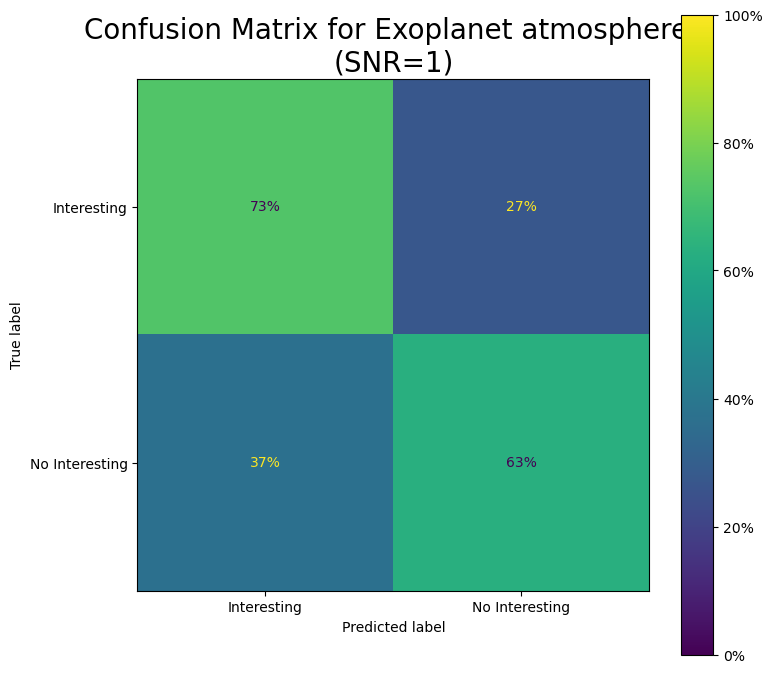

In [13]:
remove_warnings()

SNR_val_predictions = rf.predict_proba(SNR_val_X_test)[:, 1]
threshold = 0.4

SNR_val_y_pred = (SNR_val_predictions > threshold).astype(int)
SNR_val_test["pred"] = SNR_val_y_pred
SNR_val_test["score"] = SNR_val_predictions

print(confusion_matrix(SNR_val_y_test, SNR_val_y_pred))
print(classification_report(SNR_val_y_test, SNR_val_y_pred))

plot_confusion_matrix(
    SNR_val_y_test, SNR_val_y_pred,
    labels=[1,0], display_labels=["Interesting", "No Interesting"],
    title=f"Confusion Matrix for Exoplanet atmospheres\n(SNR={SNR})"
)

In [14]:
mix_ratios = np.logspace(-10, -1, 10)

SNR_val_test_by_atmCH4=[[] for i in range(10)]
SNR_val_test_by_atmO3=[[] for i in range(10)]


for i, mix in enumerate(range(-10,-0)):
    SNR_val_test_by_atmCH4[i]=SNR_val_test[SNR_val_test["atm CH4"]==mix]
    co2=int(len(SNR_val_test[SNR_val_test["label"]==0])/10)
    SNR_val_test_by_atmCH4[i]=pd.concat([SNR_val_test_by_atmCH4[i],
                                      SNR_val_test[SNR_val_test["label"]==0].sample(n=co2)])    
    SNR_val_test_by_atmO3[i]=SNR_val_test[SNR_val_test["atm O3"]==mix]
    SNR_val_test_by_atmO3[i]=pd.concat([SNR_val_test_by_atmO3[i],
                                        SNR_val_test[SNR_val_test["label"]==0].sample(n=co2)])
    
    
SNRall_f1_CH4 = np.zeros(len(mix_ratios))
SNRall_recall_CH4 = np.zeros(len(mix_ratios))
SNRall_precision_CH4 = np.zeros(len(mix_ratios))
SNRall_score_CH4 = np.zeros(len(mix_ratios))

SNRall_f1_O3 = np.zeros(len(mix_ratios))
SNRall_recall_O3 = np.zeros(len(mix_ratios))
SNRall_precision_O3 = np.zeros(len(mix_ratios))
SNRall_score_O3 = np.zeros(len(mix_ratios))

for j in range(len(mix_ratios)):
                
                SNRall_f1_CH4[j] = f1_score(
                    SNR_val_test_by_atmCH4[j]["label"].astype(int),
                    SNR_val_test_by_atmCH4[j]["pred"].astype(int)
                    )
                
                SNRall_recall_CH4[j] = recall_score(
                    SNR_val_test_by_atmCH4[j]["label"].astype(int),
                    SNR_val_test_by_atmCH4[j]["pred"].astype(int)
                    )
                
                SNRall_precision_CH4[j]=precision_score(
                    SNR_val_test_by_atmCH4[j]["label"].astype(int),
                    SNR_val_test_by_atmCH4[j]["pred"].astype(int)
                    )
                SNRall_f1_O3[j] = f1_score(
                    SNR_val_test_by_atmO3[j]["label"].astype(int),
                    SNR_val_test_by_atmO3[j]["pred"].astype(int)
                    )
                
                SNRall_recall_O3[j] = recall_score(
                    SNR_val_test_by_atmO3[j]["label"].astype(int),
                    SNR_val_test_by_atmO3[j]["pred"].astype(int)
                    )
                
                SNRall_precision_O3[j]=precision_score(
                    SNR_val_test_by_atmO3[j]["label"].astype(int),
                    SNR_val_test_by_atmO3[j]["pred"].astype(int)
                    )
                

Text(0.5, 1.0, 'Scores for $H_2O$ Detection\n(SNR=1)')

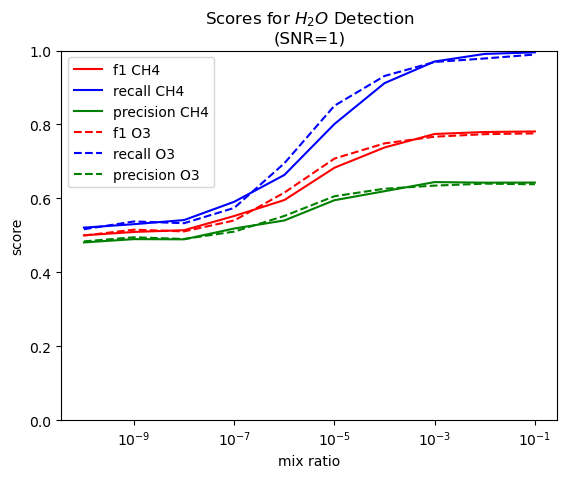

In [15]:
## plot scores
plt.figure()
plt.plot(mix_ratios,SNRall_f1_CH4,label="f1 CH4",color="red")
plt.plot(mix_ratios,SNRall_recall_CH4,label="recall CH4",color="blue")
plt.plot(mix_ratios,SNRall_precision_CH4,label="precision CH4",color="green")
plt.plot(mix_ratios,SNRall_f1_O3,label="f1 O3",color="red",linestyle="--")
plt.plot(mix_ratios,SNRall_recall_O3,label="recall O3",color="blue",linestyle="--")
plt.plot(mix_ratios,SNRall_precision_O3,label="precision O3",color="green",linestyle="--")

plt.xlabel("mix ratio")
plt.xscale("log")
plt.ylabel("score")
plt.ylim(0,1)

plt.legend()
plt.title(f"Scores for $H_2O$ Detection\n(SNR={SNR})")

## Test for SNR

SNR=1
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 1
SCORES
[[57008 32992]
 [24355 65645]]
              precision    recall  f1-score   support

           0       0.70      0.63      0.67     90000
           1       0.67      0.73      0.70     90000

    accuracy                           0.68    180000
   macro avg       0.68      0.68      0.68    180000
weighted avg       0.68      0.68      0.68    180000



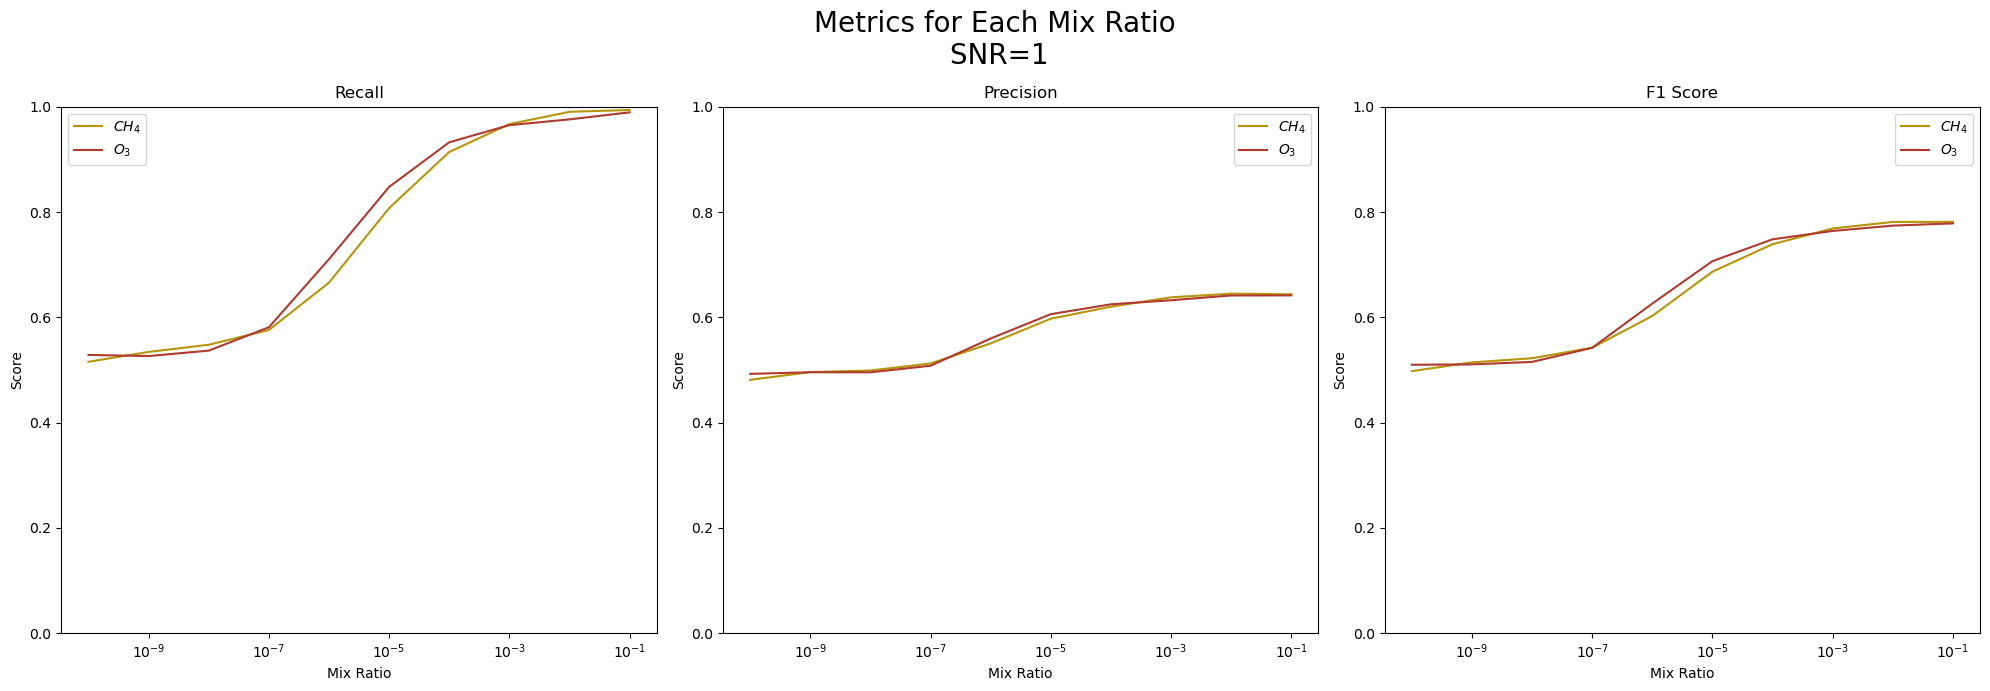

SNR=2
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 2
SCORES
[[78793 11207]
 [29947 60053]]
              precision    recall  f1-score   support

           0       0.72      0.88      0.79     90000
           1       0.84      0.67      0.74     90000

    accuracy                           0.77    180000
   macro avg       0.78      0.77      0.77    180000
weighted avg       0.78      0.77      0.77    180000



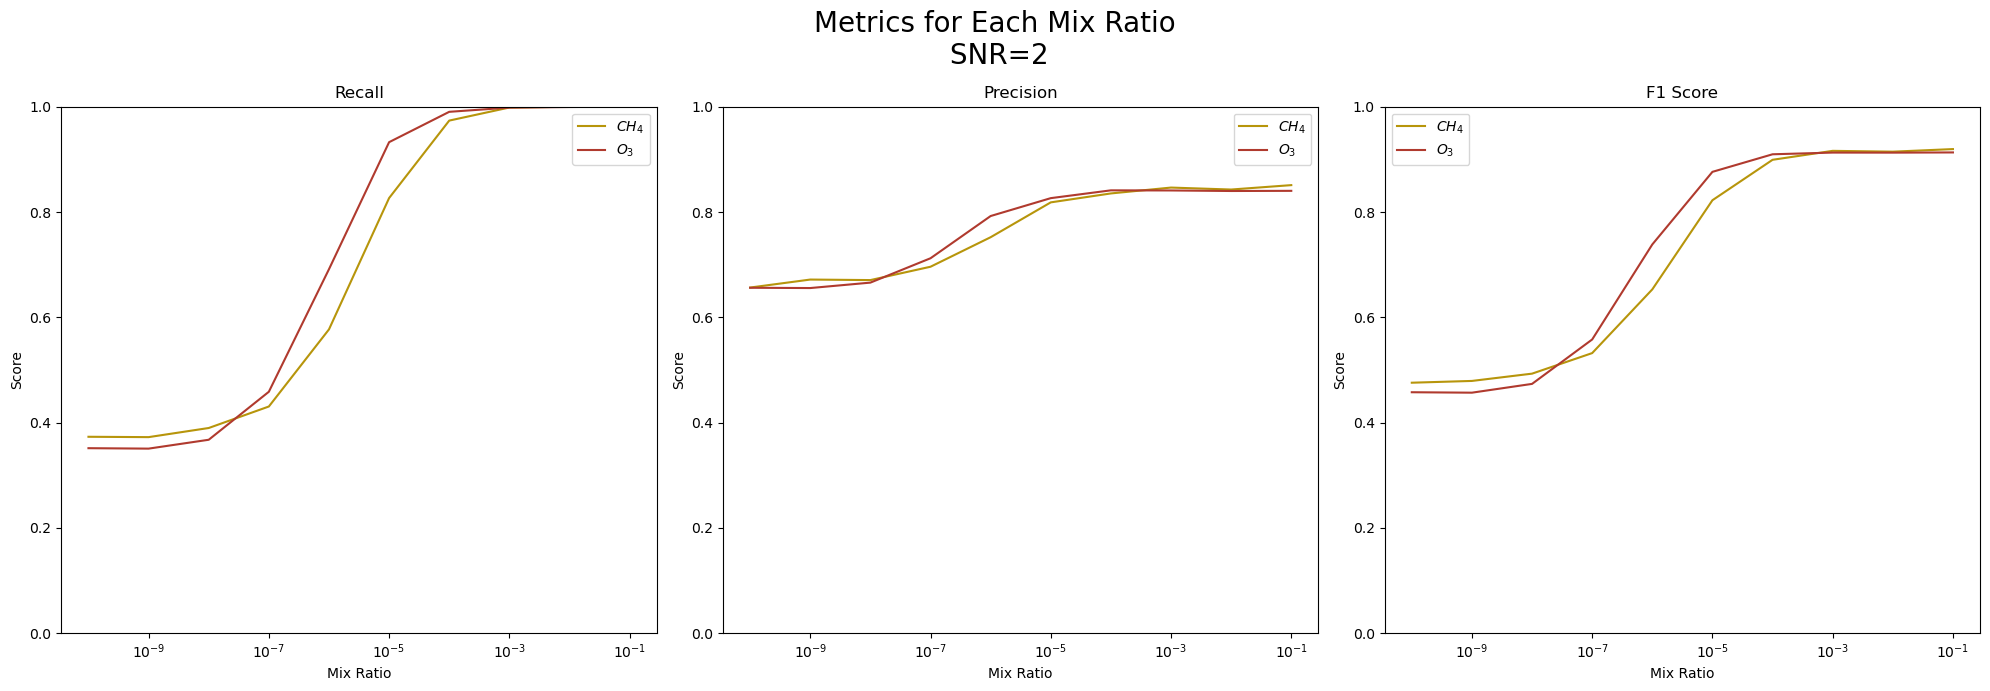

SNR=3
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 3
SCORES
[[86537  3463]
 [32026 57974]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83     90000
           1       0.94      0.64      0.77     90000

    accuracy                           0.80    180000
   macro avg       0.84      0.80      0.80    180000
weighted avg       0.84      0.80      0.80    180000



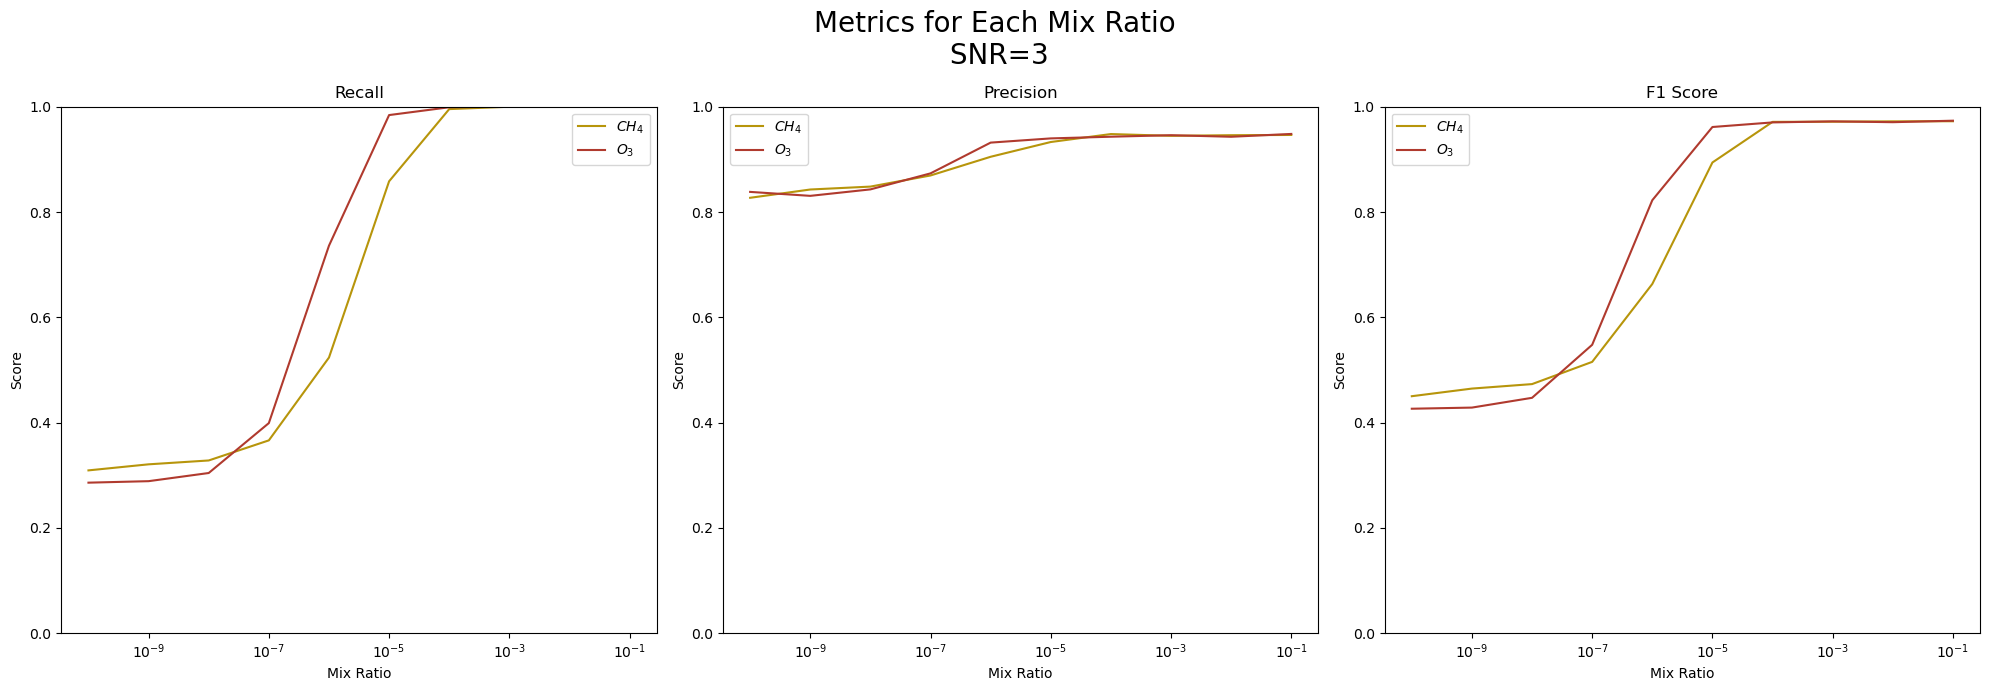

SNR=4
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 4
SCORES
[[88498  1502]
 [31716 58284]]
              precision    recall  f1-score   support

           0       0.74      0.98      0.84     90000
           1       0.97      0.65      0.78     90000

    accuracy                           0.82    180000
   macro avg       0.86      0.82      0.81    180000
weighted avg       0.86      0.82      0.81    180000



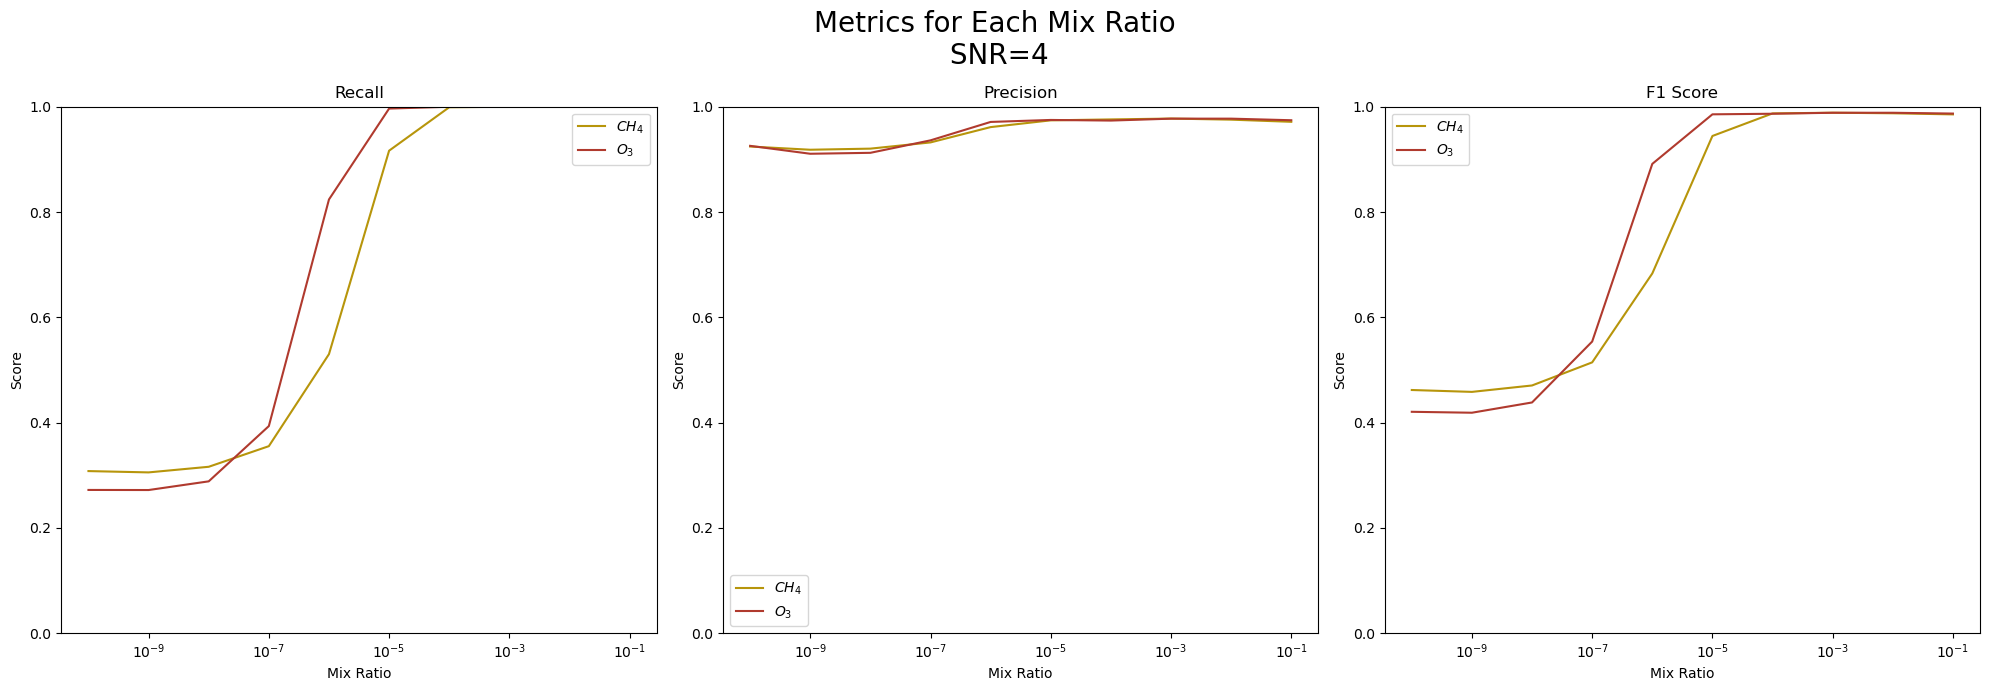

SNR=5
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 5
SCORES
[[88928  1072]
 [30429 59571]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85     90000
           1       0.98      0.66      0.79     90000

    accuracy                           0.82    180000
   macro avg       0.86      0.82      0.82    180000
weighted avg       0.86      0.82      0.82    180000



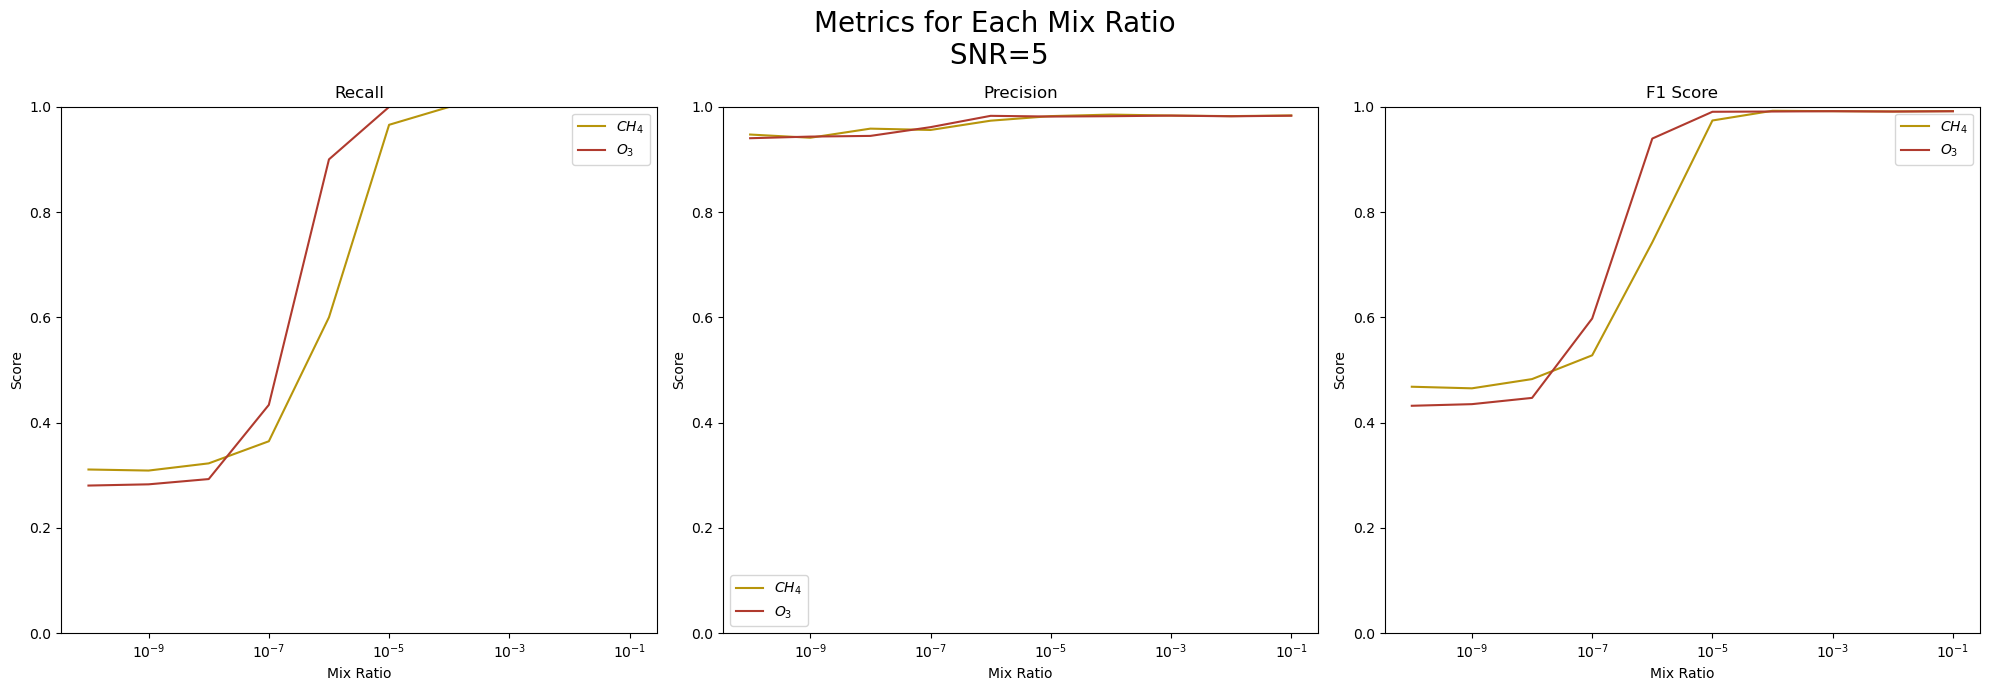

SNR=6
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 6
SCORES
[[88924  1076]
 [29000 61000]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.86     90000
           1       0.98      0.68      0.80     90000

    accuracy                           0.83    180000
   macro avg       0.87      0.83      0.83    180000
weighted avg       0.87      0.83      0.83    180000



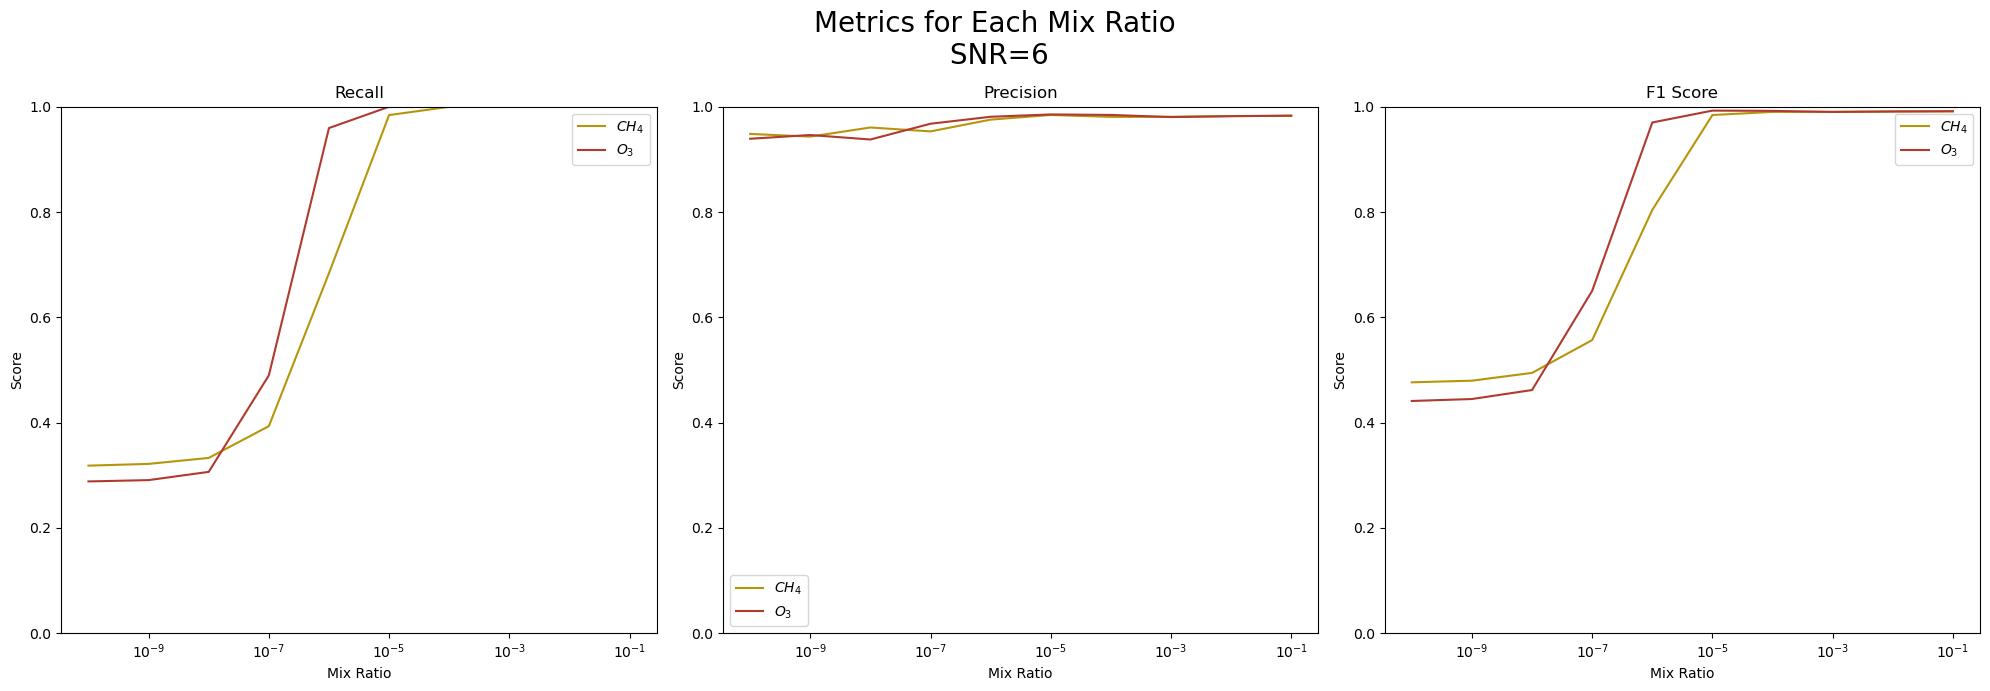

SNR=7
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 7
SCORES
[[88759  1241]
 [27272 62728]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86     90000
           1       0.98      0.70      0.81     90000

    accuracy                           0.84    180000
   macro avg       0.87      0.84      0.84    180000
weighted avg       0.87      0.84      0.84    180000



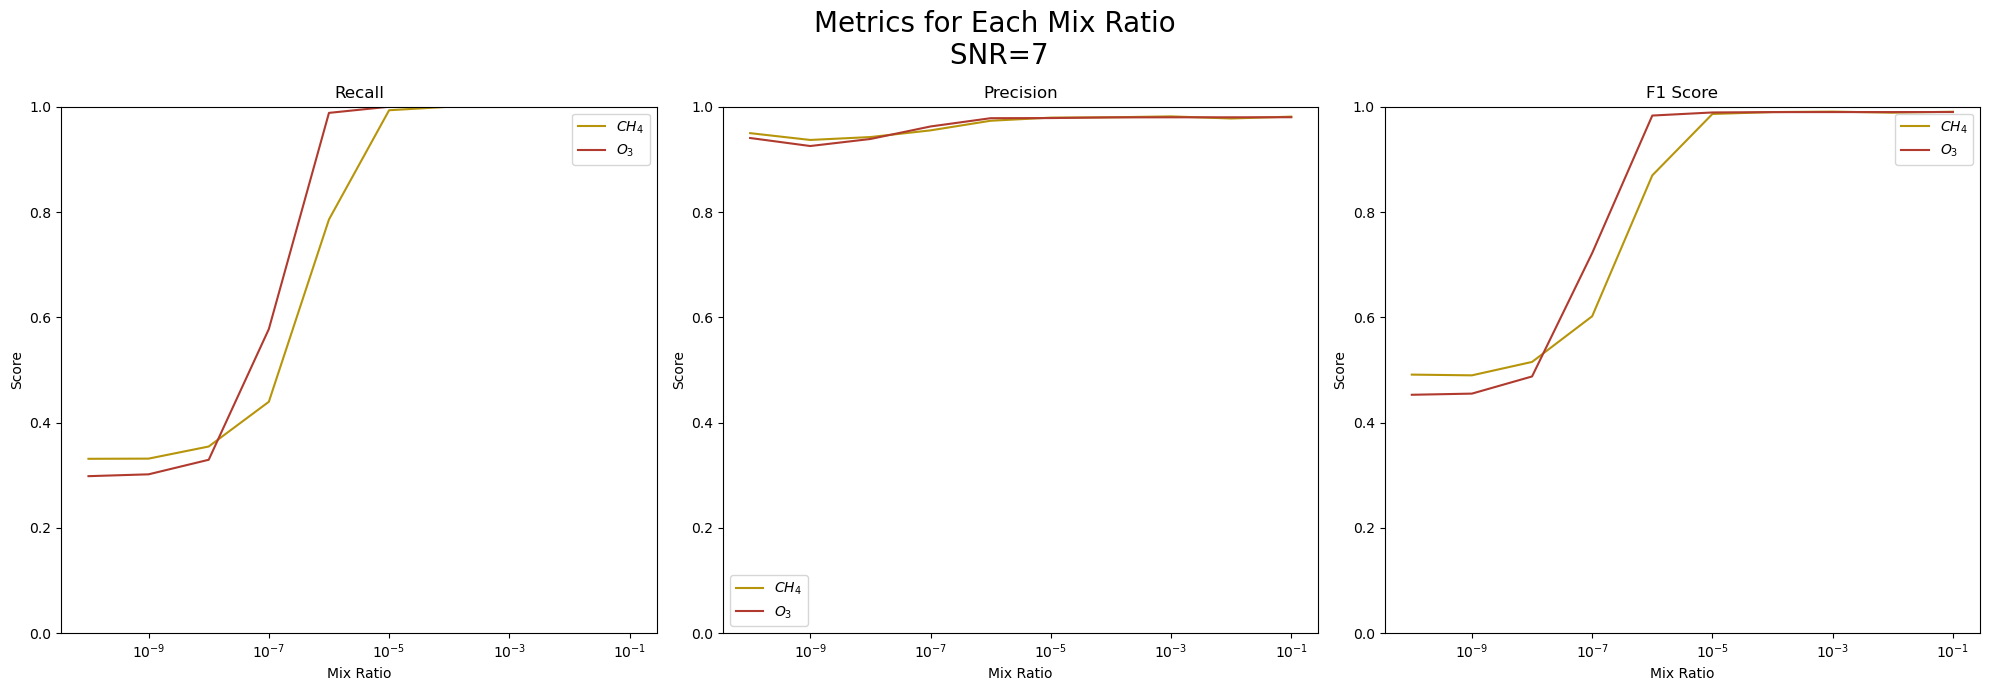

SNR=8
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 8
SCORES
[[88413  1587]
 [25572 64428]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87     90000
           1       0.98      0.72      0.83     90000

    accuracy                           0.85    180000
   macro avg       0.88      0.85      0.85    180000
weighted avg       0.88      0.85      0.85    180000



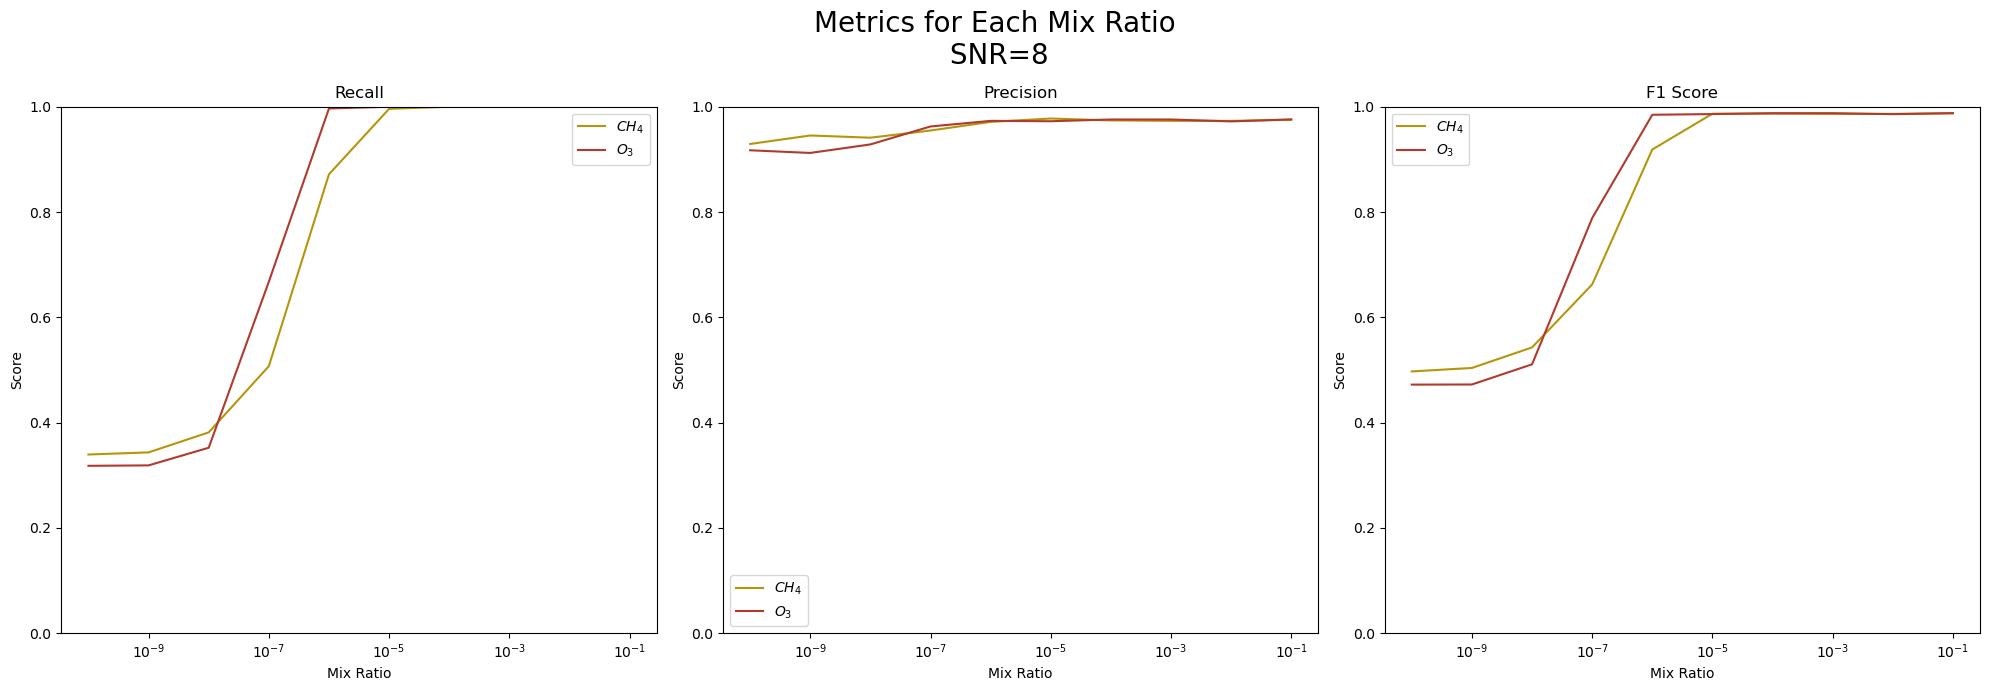

SNR=9
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 9
SCORES
[[88060  1940]
 [24042 65958]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87     90000
           1       0.97      0.73      0.84     90000

    accuracy                           0.86    180000
   macro avg       0.88      0.86      0.85    180000
weighted avg       0.88      0.86      0.85    180000



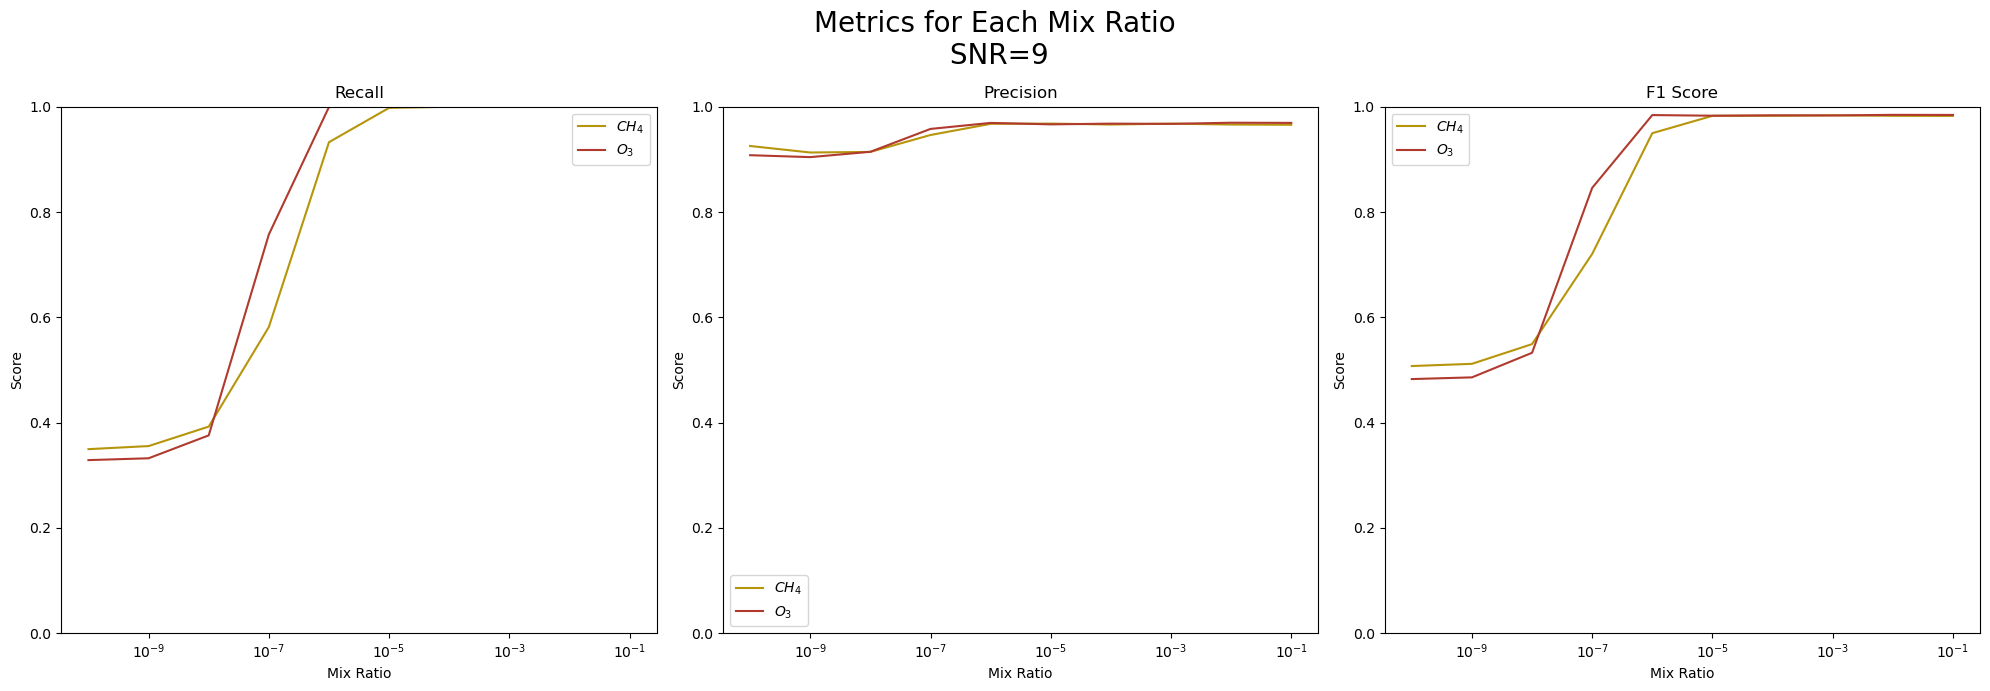

SNR=10
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 10
SCORES
[[87614  2386]
 [22517 67483]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     90000
           1       0.97      0.75      0.84     90000

    accuracy                           0.86    180000
   macro avg       0.88      0.86      0.86    180000
weighted avg       0.88      0.86      0.86    180000



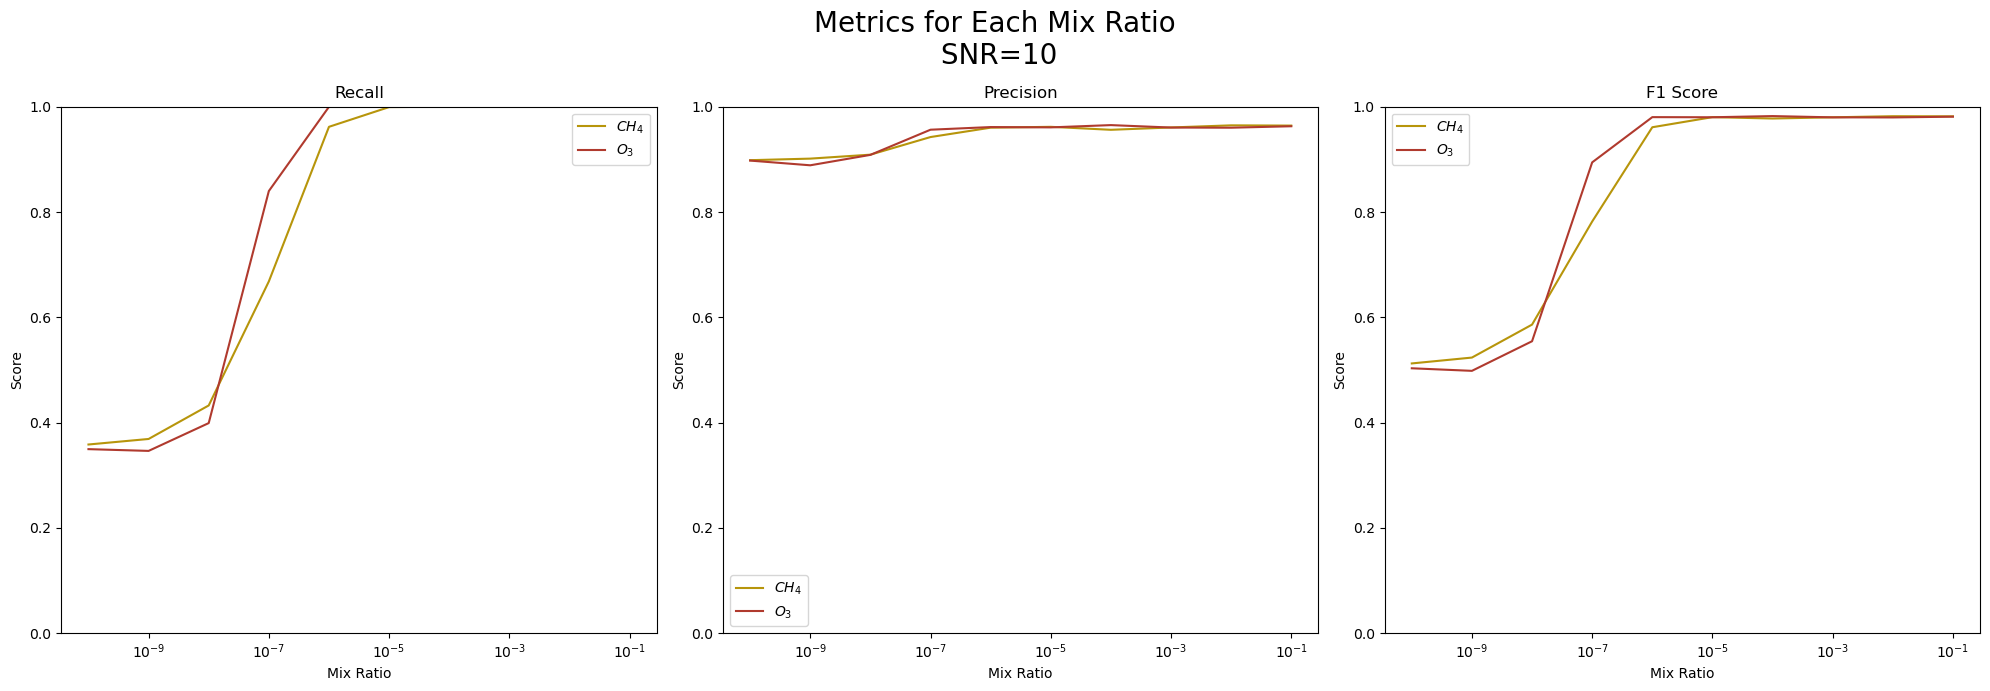

SNR=13
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 13
SCORES
[[86804  3196]
 [19449 70551]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     90000
           1       0.96      0.78      0.86     90000

    accuracy                           0.87    180000
   macro avg       0.89      0.87      0.87    180000
weighted avg       0.89      0.87      0.87    180000



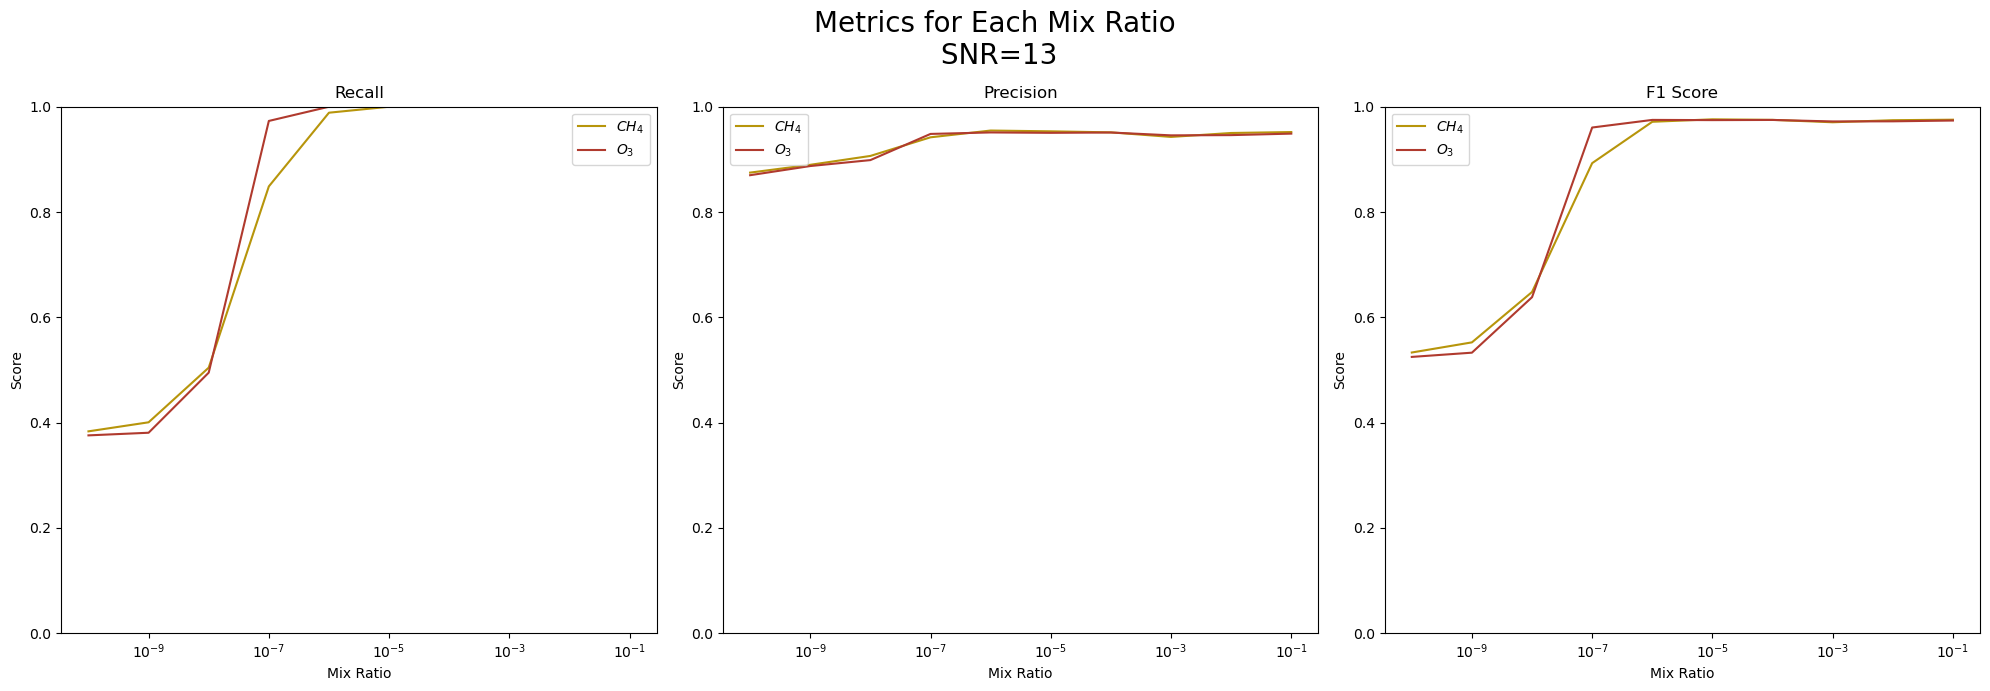

SNR=15
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 15
SCORES
[[86622  3378]
 [18266 71734]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     90000
           1       0.96      0.80      0.87     90000

    accuracy                           0.88    180000
   macro avg       0.89      0.88      0.88    180000
weighted avg       0.89      0.88      0.88    180000



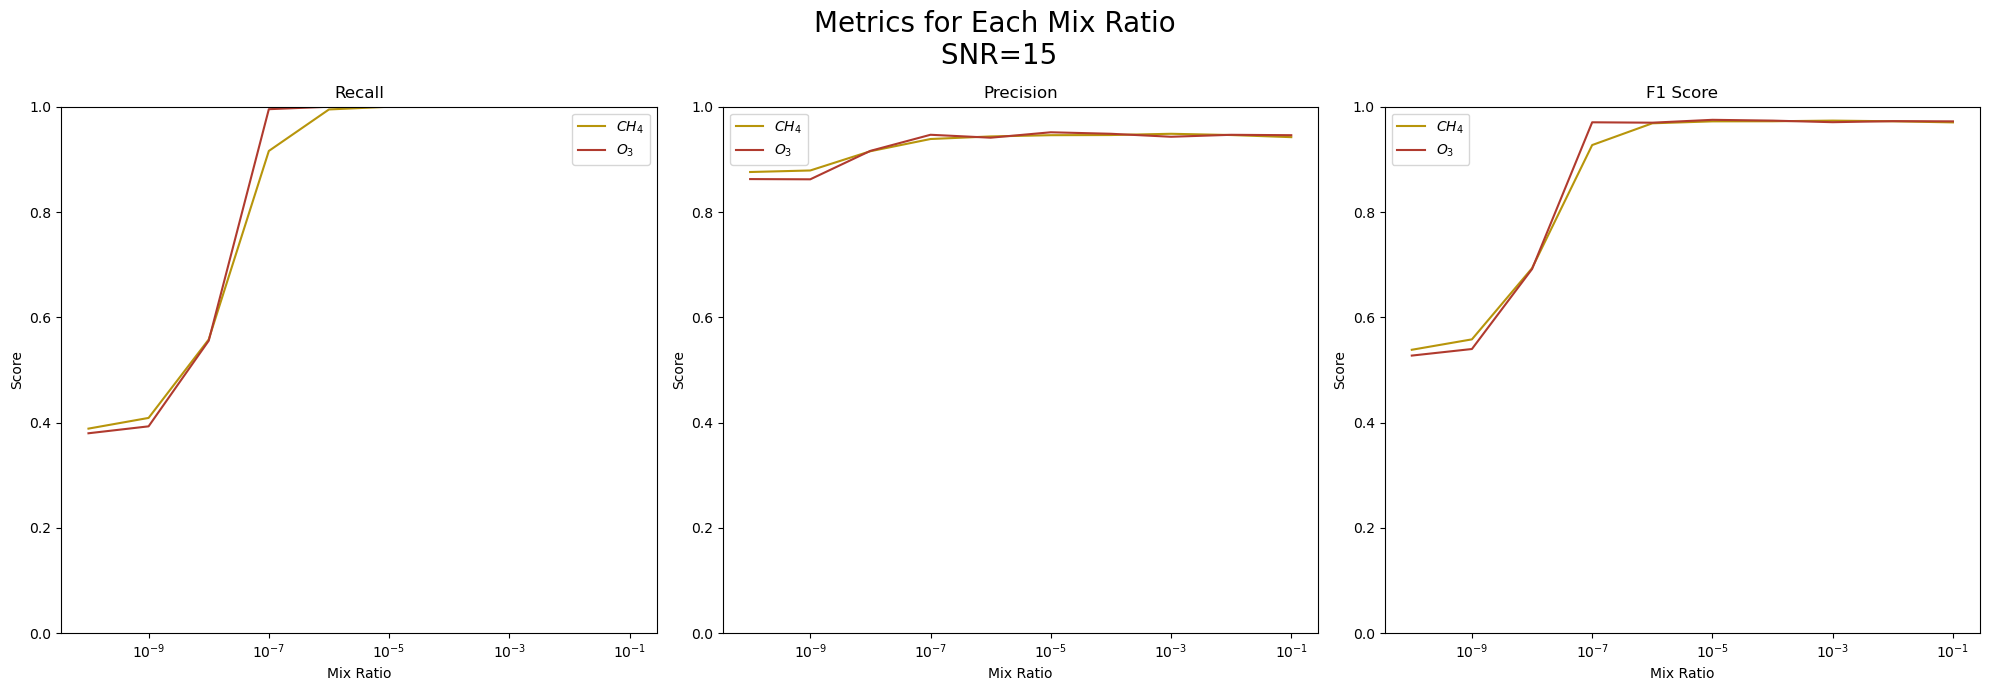

SNR=18
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 18
SCORES
[[87117  2883]
 [17455 72545]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     90000
           1       0.96      0.81      0.88     90000

    accuracy                           0.89    180000
   macro avg       0.90      0.89      0.89    180000
weighted avg       0.90      0.89      0.89    180000



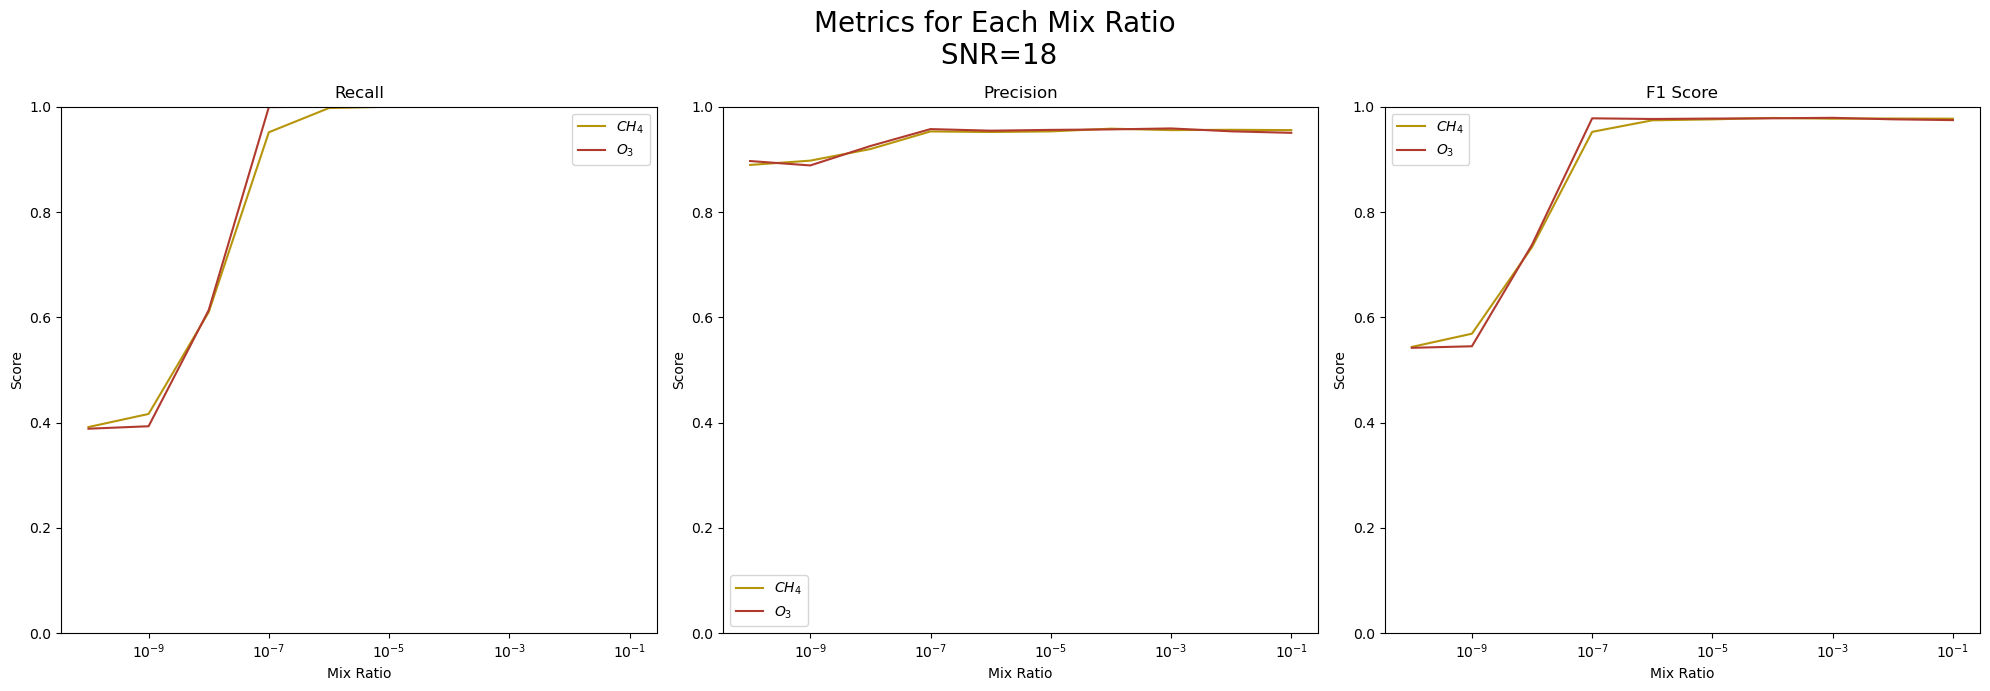

SNR=20
label
0    90000
1    90000
Name: count, dtype: int64
SNR= 20
SCORES
[[87766  2234]
 [17455 72545]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     90000
           1       0.97      0.81      0.88     90000

    accuracy                           0.89    180000
   macro avg       0.90      0.89      0.89    180000
weighted avg       0.90      0.89      0.89    180000



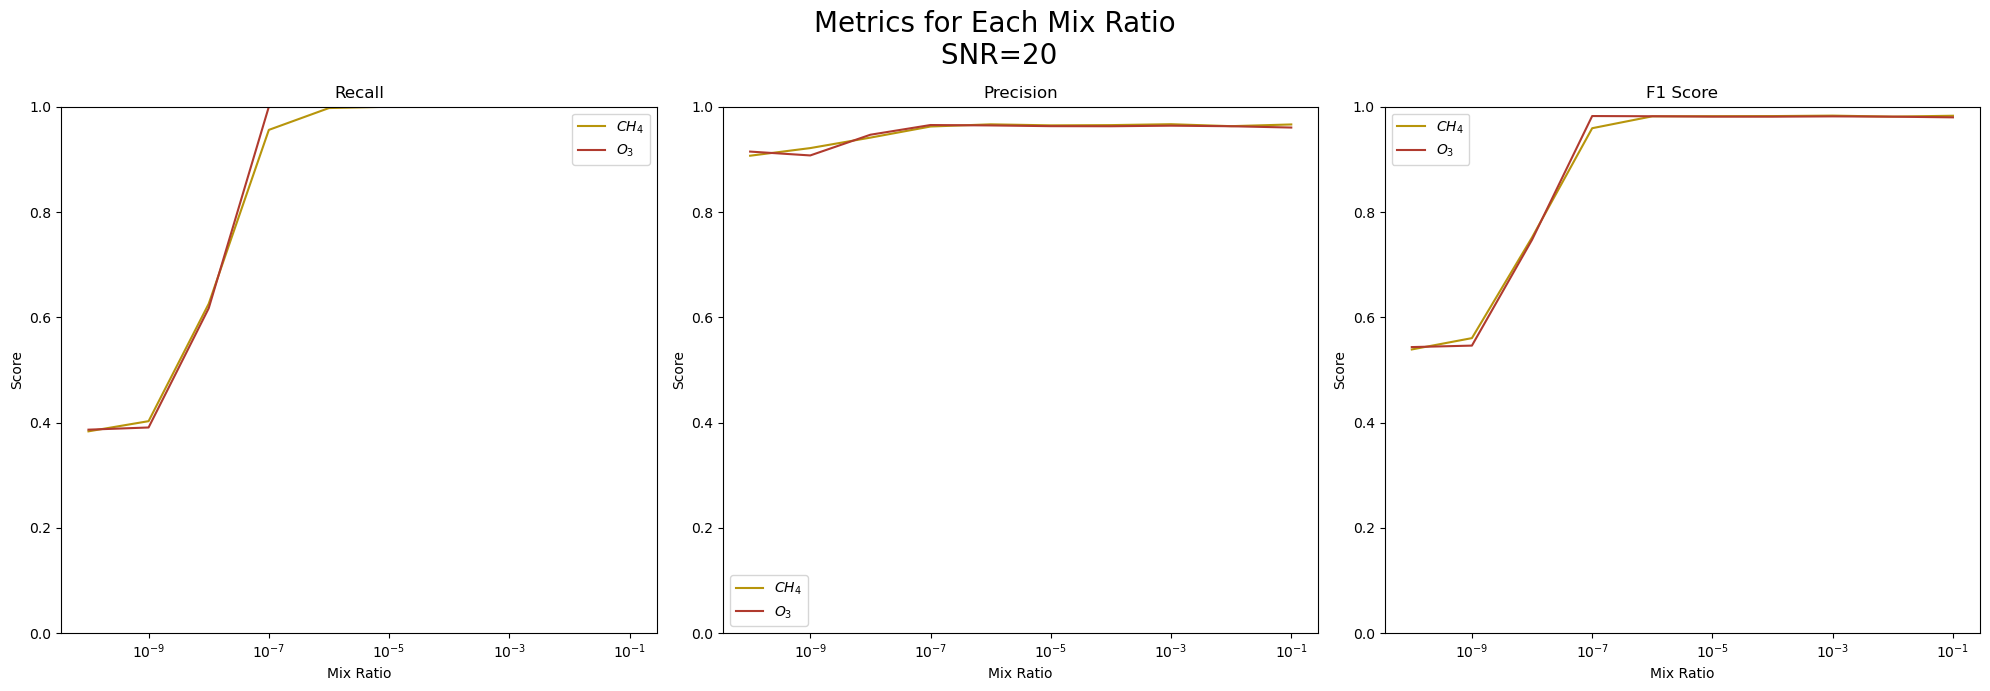

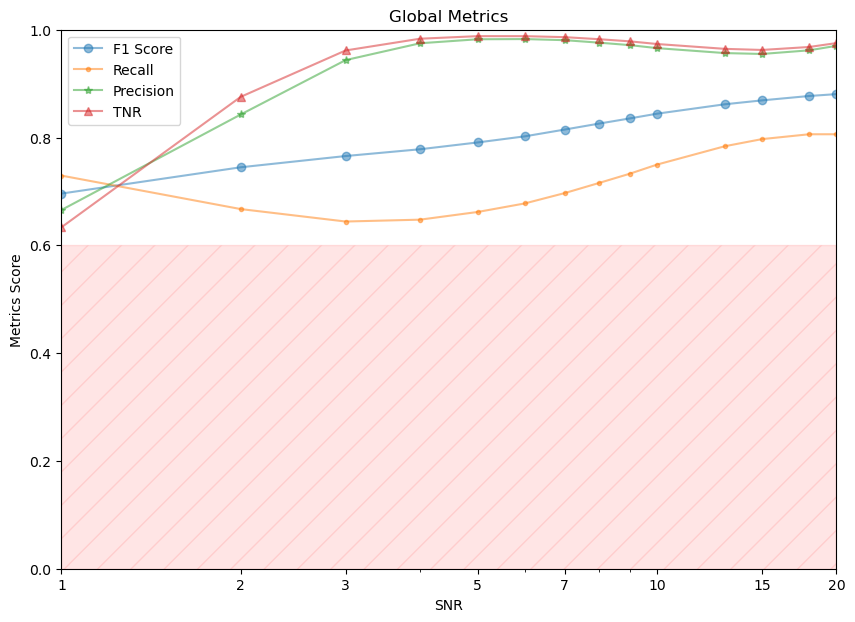

[1e-06, 1e-05, 1e-05, 1e-05, 1e-05, 1e-06, 1e-06, 1e-06, 1e-06, 1e-07, 1e-07, 1e-07, 1e-08, 1e-08]


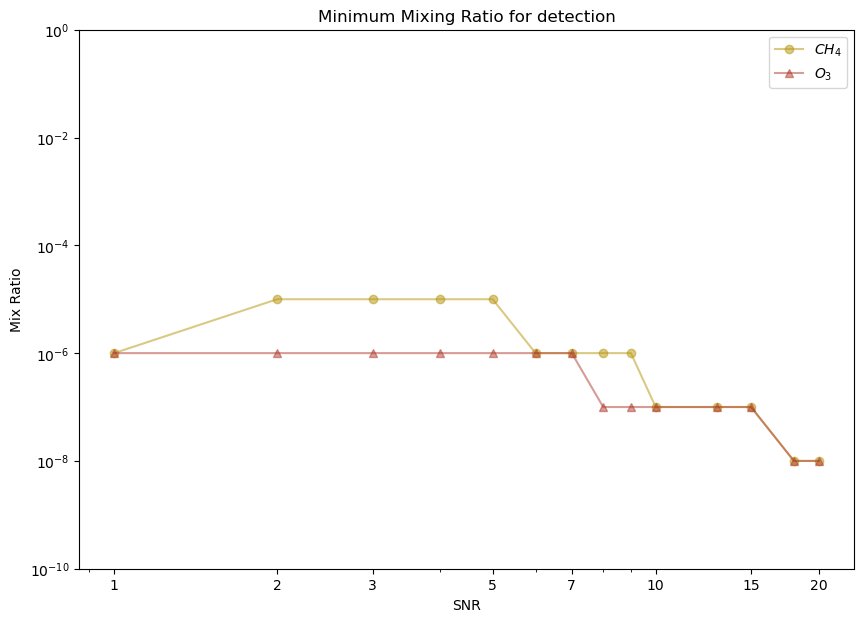

In [16]:
SNRS=[1,2,3,4,5,6,7,8,9,10,13,15,18,20]


mol_SNR_scores = dict(
    SNR=[],
    f1= [ [] , []  ],
    recall_score = [ [] , [] ],
    precision_score= [ [] , [] ],
    accuracy= [ [] , [] ],
    min_mix_ratio= [ [] , [] ],
)

global_SNR_scores = dict(
    SNR=[],
    f1=[],
    recall=[],
    precision=[],
    TNR = []
)
    

for i,SNR in enumerate(SNRS):
    print(f"SNR={SNR}")
    SNR_test_CO2_data = mrex.generate_df_SNR_noise(
        df=CO2_data,
        n_repeat=15_000,
        SNR= SNR    
    )

    SNR_test_CH4_data = mrex.generate_df_SNR_noise(
        df=CH4_data,
        n_repeat=500,
        SNR= SNR    
    )

    SNR_test_O3_data = mrex.generate_df_SNR_noise(
        df=O3_data,
        n_repeat=500,
        SNR= SNR    
    )

    SNR_test_H2O_data = mrex.generate_df_SNR_noise(
        df=H2O_data,
        n_repeat=1500,
        SNR= SNR    
    )

    SNR_test_CH4_O3_data = mrex.generate_df_SNR_noise(
        df=CH4_O3_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_CH4_H2O_data = mrex.generate_df_SNR_noise(
        df=CH4_H2O_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_O3_H2O_data = mrex.generate_df_SNR_noise(
        df=O3_H2O_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
        df=CH4_O3_H2O_data,
        n_repeat=5,
        SNR=SNR
    )        

    SNR_test_df = pd.concat(
        [
            SNR_test_CO2_data,
            SNR_test_CH4_data,
            SNR_test_O3_data,
            SNR_test_H2O_data,
            SNR_test_CH4_O3_data,
            SNR_test_CH4_H2O_data,
            SNR_test_O3_H2O_data,
            SNR_test_CH4_O3_H2O_data
        ],
        ignore_index=True
    ) 

    SNR_test_df.iloc[:,-n_points:]=normalize_min_max_by_row(SNR_test_df.iloc[:,-n_points:])
    SNR_X_test = SNR_test_df.iloc[:,-n_points:]

    remove_warnings()
    
    probabilities= rf.predict_proba(SNR_X_test)[:,1]
    threshold = 0.4
    
    y_pred = (probabilities > threshold).astype(int)
    print(SNR_test_df["label"].value_counts())
    SNR_test_df["pred"] = y_pred
    SNR_test_df["score"] = probabilities
    
    ## Global scores
    global_SNR_scores["SNR"].append(SNR)
    global_SNR_scores["f1"].append(f1_score(SNR_test_df["label"].astype(int),
                   SNR_test_df["pred"].astype(int)))
    global_SNR_scores["recall"].append(recall_score(SNR_test_df["label"].astype(int),
                     SNR_test_df["pred"].astype(int)))
    global_SNR_scores["precision"].append(precision_score(SNR_test_df["label"].astype(int),
                      SNR_test_df["pred"].astype(int)))
    print("SNR=" , SNR)
    global_SNR_scores["TNR"].append(recall_score(SNR_test_df["label"].astype(int),
                                                 SNR_test_df["pred"].astype(int), pos_label=0))
    
    print("SCORES")
    print(confusion_matrix(SNR_test_df["label"].astype(int), SNR_test_df["pred"].astype(int)))
    print(classification_report(SNR_test_df["label"].astype(int), SNR_test_df["pred"].astype(int)))
    
    ##  Per mix
    CH4_SNR_test_by_atmCH4=[[] for i in range(10)]
    O3_SNR_test_by_atmO3=[[] for i in range(10)]
    mix_ratios = np.logspace(-10,-1,10)
    
    for i, j in enumerate(range(-10,-0)):
        CH4_SNR_test_by_atmCH4[i]=SNR_test_df[SNR_test_df["atm CH4"]==j]
        co2=int(len(SNR_test_df[SNR_test_df["label"]==0])/10)
        no_CH4 = (
            SNR_test_df[SNR_test_df["label"]==0].sample(co2)
            )
        CH4_SNR_test_by_atmCH4[i]=pd.concat([CH4_SNR_test_by_atmCH4[i],
                                                no_CH4])
        
        O3_SNR_test_by_atmO3[i]=SNR_test_df[SNR_test_df["atm O3"]==j]
        co2=int(len(SNR_test_df[SNR_test_df["label"]==0])/10)
        no_O3 = (
            SNR_test_df[SNR_test_df["label"]==0].sample(co2)
            )
        O3_SNR_test_by_atmO3[i]=pd.concat([O3_SNR_test_by_atmO3[i],
                                                no_O3])
    CH4_SNR_f1 = np.zeros(len(mix_ratios))
    CH4_SNR_recall = np.zeros(len(mix_ratios))
    CH4_SNR_precision = np.zeros(len(mix_ratios))
    
    O3_SNR_f1 = np.zeros(len(mix_ratios))
    O3_SNR_recall = np.zeros(len(mix_ratios))
    O3_SNR_precision = np.zeros(len(mix_ratios))
        
    for j in range(len(mix_ratios)):
                    
        CH4_SNR_f1[j] = f1_score(
            CH4_SNR_test_by_atmCH4[j]["label"].astype(int),
            CH4_SNR_test_by_atmCH4[j]["pred"].astype(int)
            )
        
        CH4_SNR_recall[j] = recall_score(
            CH4_SNR_test_by_atmCH4[j]["label"].astype(int),
            CH4_SNR_test_by_atmCH4[j]["pred"].astype(int)
            )
        
        CH4_SNR_precision[j]=precision_score(
            CH4_SNR_test_by_atmCH4[j]["label"].astype(int),
            CH4_SNR_test_by_atmCH4[j]["pred"].astype(int)
            )
        
        O3_SNR_f1[j] = f1_score(
            O3_SNR_test_by_atmO3[j]["label"].astype(int),
            O3_SNR_test_by_atmO3[j]["pred"].astype(int)
            )
        
        O3_SNR_recall[j] = recall_score(
            O3_SNR_test_by_atmO3[j]["label"].astype(int),
            O3_SNR_test_by_atmO3[j]["pred"].astype(int)
            )
        
        O3_SNR_precision[j]=precision_score(
            O3_SNR_test_by_atmO3[j]["label"].astype(int),
            O3_SNR_test_by_atmO3[j]["pred"].astype(int)
            )        
    
    ## plot metrics
    fig, ax = plt.subplots(1, 3, figsize=(20, 7))
    
    ax[2].plot(mix_ratios, CH4_SNR_f1, label="$CH_4$", color= "#B7950B")
    ax[2].plot(mix_ratios, O3_SNR_f1, label="$O_3$",color= "#B03A2E")
    ax[2].set_xscale("log")
    ax[2].set_xlabel("Mix Ratio")
    ax[2].set_ylabel("Score")
    ax[2].set_title("F1 Score")
    ax[2].set_ylim(0,1)
    ax[2].legend()

    ax[0].plot(mix_ratios, CH4_SNR_recall, label="$CH_4$", color= "#B7950B")    
    ax[0].plot(mix_ratios, O3_SNR_recall, label="$O_3$",color= "#B03A2E")
    ax[0].set_xscale("log")
    ax[0].set_xlabel("Mix Ratio")
    ax[0].set_ylabel("Score")
    ax[0].set_title("Recall")
    ax[0].set_ylim(0,1)
    ax[0].legend()
    
    ax[1].plot(mix_ratios, CH4_SNR_precision, label="$CH_4$", color= "#B7950B")
    ax[1].plot(mix_ratios, O3_SNR_precision, label="$O_3$",color= "#B03A2E")
    ax[1].set_xscale("log")
    ax[1].set_xlabel("Mix Ratio")
    ax[1].set_ylabel("Score")
    ax[1].set_title("Precision")
    ax[1].set_ylim(0,1)
    ax[1].legend()
    
    plt.suptitle(f"Metrics for Each Mix Ratio\n SNR={SNR}", fontsize=20)
    
    plt.tight_layout()
    
    plt.show()
    
    CH4_min_mix_ratio = mix_ratios[np.where(CH4_SNR_recall>0.6)][0]
    O3_min_mix_ratio = mix_ratios[np.where(O3_SNR_recall>0.6)][0]
        
    mol_SNR_scores["min_mix_ratio"][0].append(CH4_min_mix_ratio)
    mol_SNR_scores["min_mix_ratio"][1].append(O3_min_mix_ratio)
    mol_SNR_scores["f1"][0].append(CH4_SNR_f1.mean())
    mol_SNR_scores["f1"][1].append(O3_SNR_f1.mean())
    mol_SNR_scores["recall_score"][0].append(CH4_SNR_recall.mean())
    mol_SNR_scores["recall_score"][1].append(O3_SNR_recall.mean())
    mol_SNR_scores["precision_score"][0].append(CH4_SNR_precision.mean())
    mol_SNR_scores["precision_score"][1].append(O3_SNR_precision.mean()) 

plt.figure(figsize=(10, 7))
plt.plot(global_SNR_scores["SNR"], global_SNR_scores["f1"], label="F1 Score",
         marker="o",alpha=0.5)
plt.plot(global_SNR_scores["SNR"], global_SNR_scores["recall"], label="Recall",
         marker=".",alpha=0.5)
plt.plot(global_SNR_scores["SNR"], global_SNR_scores["precision"], label="Precision",
         marker="*",alpha=0.5,)
plt.plot(global_SNR_scores["SNR"], global_SNR_scores["TNR"], label="TNR",
         marker="^",alpha=0.5,)
plt.ylim(0,1)

plt.fill_between(global_SNR_scores["SNR"], 0, 0.6,
                 hatch = "/",
                 color="red",
                 alpha = 0.1)
plt.xscale("log")
plt.xlabel("SNR")
## set ticks of x
plt.xticks([1,2,3,5,7,10,15,20])
plt.xlim(1,20)
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())

plt.ylabel("Metrics Score")
plt.title("Global Metrics")
plt.legend()
plt.show()
print(mol_SNR_scores["min_mix_ratio"][0])
plt.figure(figsize=(10, 7))
plt.plot(global_SNR_scores["SNR"], mol_SNR_scores["min_mix_ratio"][0],  
         "-o",
         label="$CH_4$", 
         color= "#B7950B",
         alpha=0.5,
)
plt.plot(global_SNR_scores["SNR"], mol_SNR_scores["min_mix_ratio"][1],
            label="$O_3$", 
            color= "#B03A2E",
            marker= "^",
            alpha=0.5)
plt.xlabel("SNR")
plt.xscale("log")
plt.xticks([1,2,3,5,7,10,15,20])
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())
plt.ylabel("Mix Ratio")
plt.ylim(1e-10,1)
plt.yscale("log")
plt.title("Minimum Mixing Ratio for detection")
plt.legend()
plt.show()

## Validation vs other molecules


SNR=2


C:\Users\santi\AppData\Local\Temp\ipykernel_10040\968098701.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


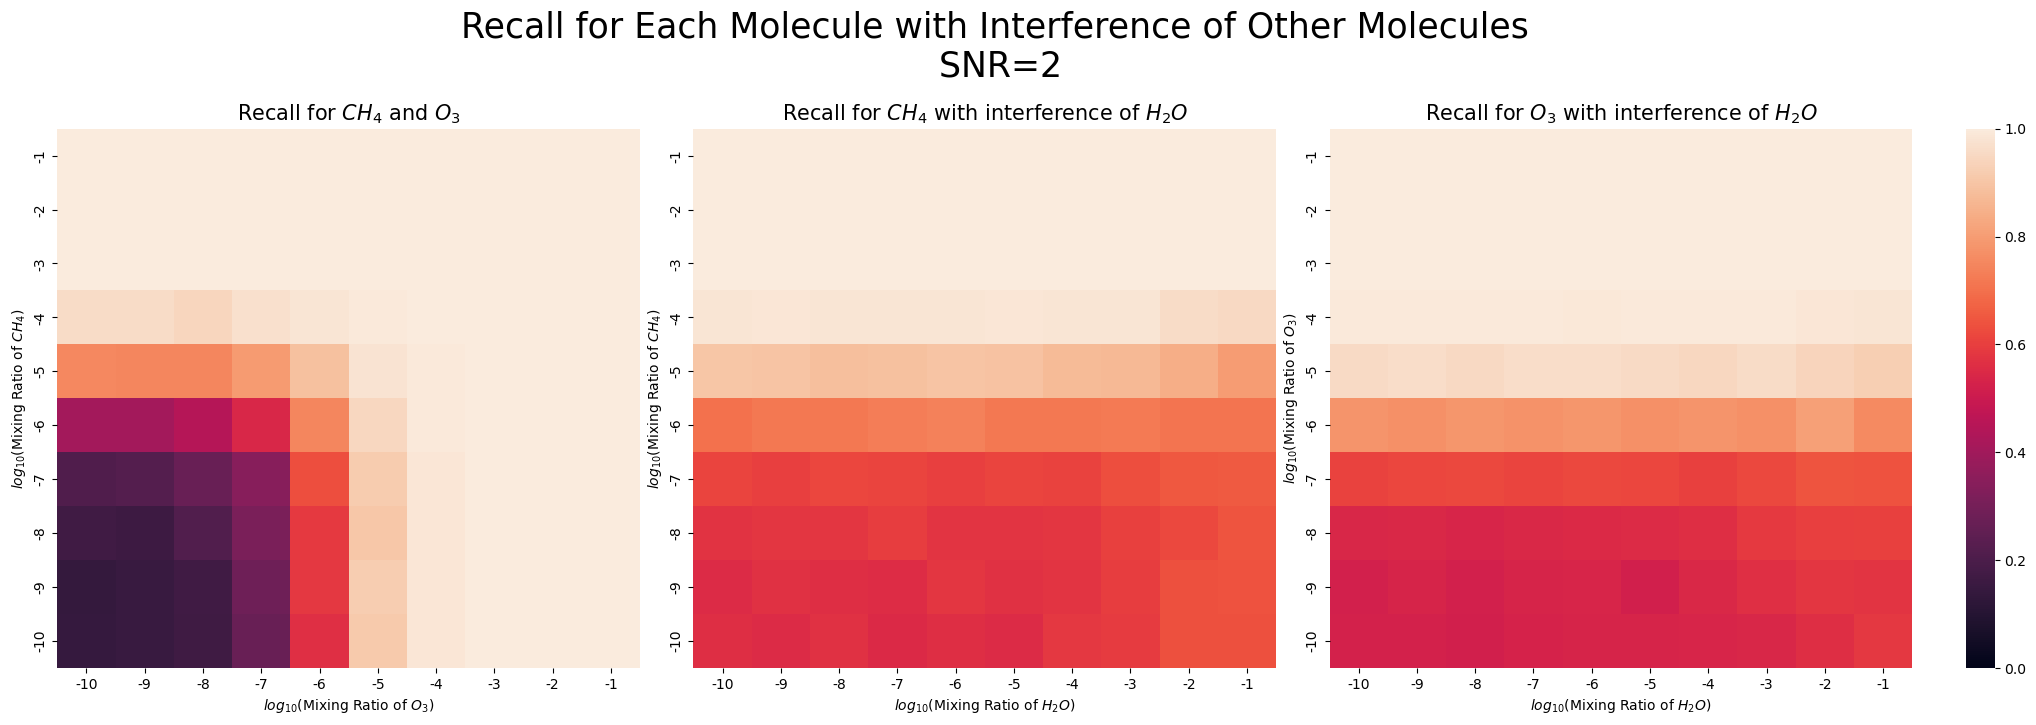

SNR=10


C:\Users\santi\AppData\Local\Temp\ipykernel_10040\968098701.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


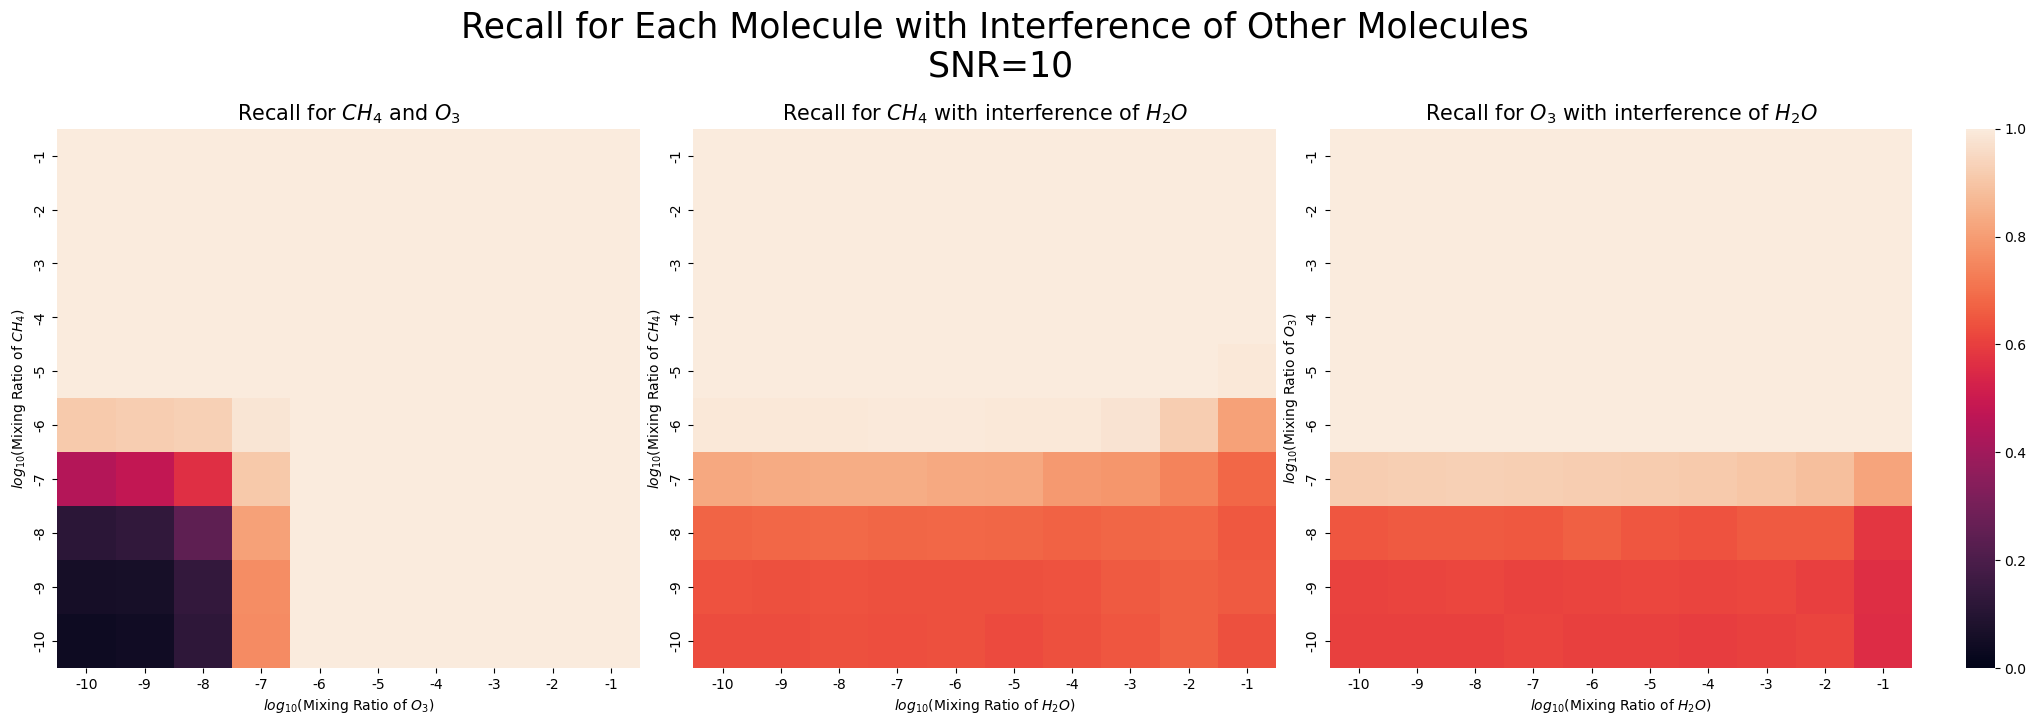

In [17]:
#SNRS=[1,3,5,7,10,15,20]
SNRS = [2,10]


for SNR in SNRS:
    print(f"SNR={SNR}")
    SNR_test_CO2_data = mrex.generate_df_SNR_noise(
        df=CO2_data,
        n_repeat=15_000,
        SNR= SNR    
    )

    SNR_test_CH4_data = mrex.generate_df_SNR_noise(
        df=CH4_data,
        n_repeat=500,
        SNR= SNR    
    )

    SNR_test_O3_data = mrex.generate_df_SNR_noise(
        df=O3_data,
        n_repeat=500,
        SNR= SNR    
    )

    SNR_test_H2O_data = mrex.generate_df_SNR_noise(
        df=H2O_data,
        n_repeat=1500,
        SNR= SNR    
    )

    SNR_test_CH4_O3_data = mrex.generate_df_SNR_noise(
        df=CH4_O3_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_CH4_H2O_data = mrex.generate_df_SNR_noise(
        df=CH4_H2O_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_O3_H2O_data = mrex.generate_df_SNR_noise(
        df=O3_H2O_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
        df=CH4_O3_H2O_data,
        n_repeat=50,
        SNR=SNR
    )
        
    SNR_test_df = pd.concat(
        [
            SNR_test_CO2_data,
            SNR_test_CH4_data,
            SNR_test_O3_data,
            SNR_test_H2O_data,
            SNR_test_CH4_O3_data,
            SNR_test_CH4_H2O_data,
            SNR_test_O3_H2O_data,
            SNR_test_CH4_O3_H2O_data
        ],
        ignore_index=True
    )
    
    
    SNR_test_df.iloc[:,-n_points:]=normalize_min_max_by_row(SNR_test_df.iloc[:,-n_points:])
    SNR_X_test = SNR_test_df.iloc[:,-n_points:]
    SNR_test = SNR_test_df["label"]
    
    SNR_test_df["label"]=SNR_test_df["label"].astype(int)    
    
    remove_warnings()
    
    probabilities= rf.predict_proba(SNR_X_test)[:,1]
    threshold = 0.4
    
    y_pred = (probabilities > threshold).astype(int)
    SNR_test_df["pred"] = y_pred
    
    
    sH2O = np.zeros(10)
    
    for i, mix in enumerate(range(-10,-0)):
        permix_sH2O = SNR_test_df[
            SNR_test_df["atm H2O"]==mix
            ]
        sH2O[i] = recall_score(permix_sH2O["label"], permix_sH2O["pred"], pos_label=0)
        
    # Recall heatmap  
    si_CH4_sO3 = np.zeros((10,10))
    si_CH4_sH2O = np.zeros((10,10))
    si_O3_sH2O = np.zeros((10,10))
    
    for i, mix1 in enumerate(range(-10,-0)):
        for j, mix2 in enumerate(range(-10,-0)):
            permix_si_CH4_sO3 = SNR_test_df[
                (SNR_test_df["atm O3"]==mix2) &
                (SNR_test_df["atm CH4"]==mix1)
                ]
            permix_si_CH4_sH2O = SNR_test_df[
                (SNR_test_df["atm H2O"]==mix2) &
                (SNR_test_df["atm CH4"]==mix1)
                ]
            permix_si_O3_sCH4 = SNR_test_df[
                (SNR_test_df["atm CH4"]==mix2) &
                (SNR_test_df["atm O3"]==mix1)
                ]
            permix_si_O3_sH2O = SNR_test_df[
                (SNR_test_df["atm H2O"]==mix2) &
                (SNR_test_df["atm O3"]==mix1)
                ]    
            si_CH4_sO3[i,j] = accuracy_score(permix_si_CH4_sO3["label"], permix_si_CH4_sO3["pred"])
            si_CH4_sH2O[i,j] = accuracy_score(permix_si_CH4_sH2O["label"], permix_si_CH4_sH2O["pred"])
            si_O3_sH2O[i,j] = accuracy_score(permix_si_O3_sH2O["label"], permix_si_O3_sH2O["pred"])
      
    log_ratios =  np.arange(-10, 0, 1)
    fig = plt.figure(figsize=(25, 7))
    gs = fig.add_gridspec(1, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.12)

    # Heatmap 1
    ax1 = fig.add_subplot(gs[0, 0])
    sns.heatmap(si_CH4_sO3, ax=ax1, vmin=0, vmax=1, xticklabels=log_ratios, yticklabels=log_ratios, cbar=False)
    ax1.set_title("Recall for $CH_4$ and $O_3$", fontsize=15)
    ax1.set_xlabel("$log_{10}$(Mixing Ratio of $O_3$)")
    ax1.set_ylabel("$log_{10}$(Mixing Ratio of $CH_4$)")
    ax1.invert_yaxis()

    # Heatmap 2
    ax2 = fig.add_subplot(gs[0, 1])
    sns.heatmap(si_CH4_sH2O, ax=ax2, vmin=0, vmax=1, xticklabels=log_ratios, yticklabels=log_ratios, cbar=False)
    ax2.set_title("Recall for $CH_4$ with interference of $H_2O$", fontsize=15)
    ax2.set_xlabel("$log_{10}$(Mixing Ratio of $H_2O$)")
    ax2.set_ylabel("$log_{10}$(Mixing Ratio of $CH_4$)")
    ax2.invert_yaxis()

    # Heatmap 3
    ax3 = fig.add_subplot(gs[0, 2])
    cbar_ax1 = fig.add_subplot(gs[0, 3])
    sns.heatmap(si_O3_sH2O, ax=ax3, vmin=0, vmax=1, xticklabels=log_ratios, yticklabels=log_ratios, cbar_ax=cbar_ax1)
    ax3.set_title("Recall for $O_3$ with interference of $H_2O$", fontsize=15)
    ax3.set_xlabel("$log_{10}$(Mixing Ratio of $H_2O$)")
    ax3.set_ylabel("$log_{10}$(Mixing Ratio of $O_3$)")
    ax3.invert_yaxis()

    plt.tight_layout()
    plt.suptitle(f"Recall for Each Molecule with Interference of Other Molecules\n SNR={SNR}", fontsize=25, y = 1.05)
    plt.show()    

SNR=1
SNR=3
SNR=5
SNR=7


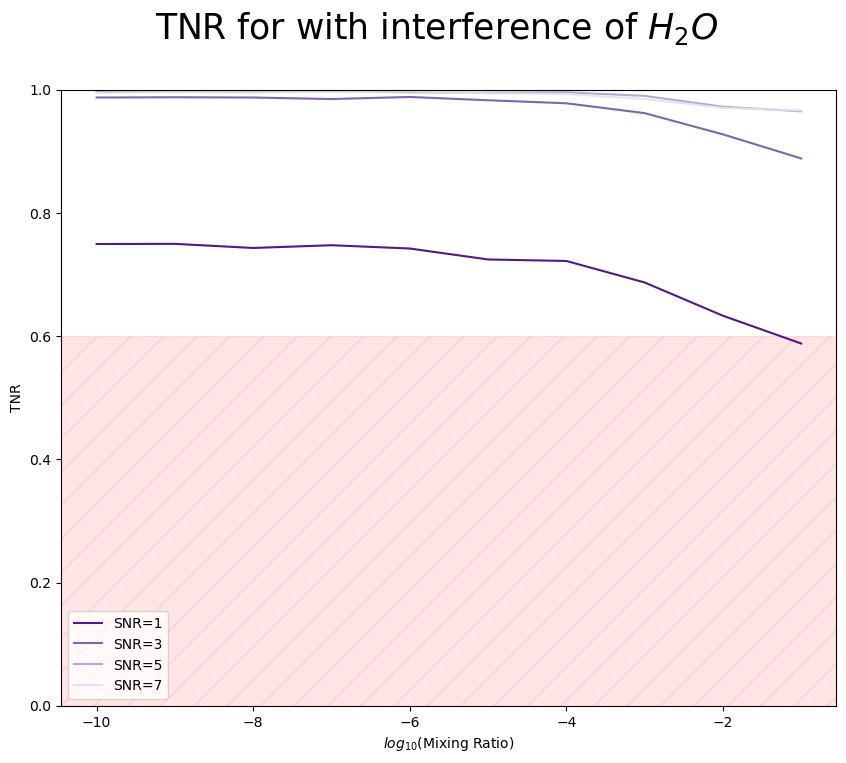

<Figure size 640x480 with 0 Axes>

In [18]:
SNRS=[1,3,5,7]
purples = plt.cm.Purples(np.linspace(1, 0.2, len(SNRS)))

FP = np.zeros(7)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for SNR in SNRS:
    print(f"SNR={SNR}")
    SNR_test_CO2_data = mrex.generate_df_SNR_noise(
        df=CO2_data,
        n_repeat=15_000,
        SNR= SNR    
    )

    SNR_test_CH4_data = mrex.generate_df_SNR_noise(
        df=CH4_data,
        n_repeat=500,
        SNR= SNR    
    )

    SNR_test_O3_data = mrex.generate_df_SNR_noise(
        df=O3_data,
        n_repeat=500,
        SNR= SNR    
    )

    SNR_test_H2O_data = mrex.generate_df_SNR_noise(
        df=H2O_data,
        n_repeat=1500,
        SNR= SNR    
    )

    SNR_test_CH4_O3_data = mrex.generate_df_SNR_noise(
        df=CH4_O3_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_CH4_H2O_data = mrex.generate_df_SNR_noise(
        df=CH4_H2O_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_O3_H2O_data = mrex.generate_df_SNR_noise(
        df=O3_H2O_data,
        n_repeat=50,
        SNR=SNR
    )

    SNR_test_CH4_O3_H2O_data = mrex.generate_df_SNR_noise(
        df=CH4_O3_H2O_data,
        n_repeat=50,
        SNR=SNR
    )
        
    SNR_test_df = pd.concat(
        [
            SNR_test_CO2_data,
            SNR_test_CH4_data,
            SNR_test_O3_data,
            SNR_test_H2O_data,
            SNR_test_CH4_O3_data,
            SNR_test_CH4_H2O_data,
            SNR_test_O3_H2O_data,
            SNR_test_CH4_O3_H2O_data
        ],
        ignore_index=True
    )
    
    
    SNR_test_df.iloc[:,-n_points:]=normalize_min_max_by_row(SNR_test_df.iloc[:,-n_points:])
    SNR_X_test = SNR_test_df.iloc[:,-n_points:]
    SNR_test = SNR_test_df["label"]
    
    SNR_test_df["label"]=SNR_test_df["label"].astype(int)    
  
    remove_warnings()
  
    ## predict
    probabilities= rf.predict_proba(SNR_X_test)[:,1]
    
    ## Asignar etiquetas basadas en el umbral ajustado
    threshold = 0.42
    
    y_pred = (probabilities > threshold).astype(int)
    
    ## Asignar etiquetas y puntuaciones a las predicciones
    SNR_test_df["pred"] = y_pred
    
    
    sH2O = np.zeros(10)
    
    for i, mix in enumerate(range(-10,-0)):
        permix_sH2O = SNR_test_df[
            SNR_test_df["atm H2O"]==mix
            ]
        sH2O[i] = recall_score(permix_sH2O["label"], permix_sH2O["pred"], pos_label=0)
        
    ##  plot accuracy
    ax.plot(range(-10,0), sH2O, 
            label=f"SNR={SNR}",
            color= purples[SNRS.index(SNR)],
            alpha=0.9)

xlim = ax.get_xlim()
ax.fill_between([-11,1], 0, 0.6,
                 hatch = "/",
                 color="red",
                 alpha = 0.1)

ax.set_xlim(xlim)
ax.set_xlabel("$log_{10}$(Mixing Ratio)")
ax.set_ylabel("TNR")
ax.set_ylim(0,1)
ax.legend()
ax.legend()
plt.suptitle(f"TNR for with interference of $H_2O$", fontsize=25)
plt.show()

plt.tight_layout()